In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import os
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import seaborn as sns
# from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import learning_curve
import optuna

c:\Users\bedom\anaconda3\envs\IP\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
folder_path = "./Features"


dataframes = {}


for file in os.listdir(folder_path):
    if file.endswith(".csv"):  
        
        df_name = os.path.splitext(file)[0].replace(" ", "_").replace("-", "_")
      
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
  
        dataframes[df_name] = df
        
       
        # print(f"Loaded DataFrame: {df_name}")
        # print(df.head(), "\n")  

Train_gabor_df = dataframes["Train_gabor_features"]  
Train_glcm_df = dataframes["Train_glcm_features"]  
Train_hsv_df =  dataframes["Train_hsv_features"]  
Train_lbp_df =  dataframes["Train_lbp_features"]  
Train_rgb_df =  dataframes["Train_rgb_features"] 
###############################################################
# Test_gabor_df = dataframes["Test_gabor_features"]  
Test_glcm_df = dataframes["Test_glcm_features"]  
Test_hsv_df =  dataframes["Test_hsv_features"]  
Test_lbp_df =  dataframes["Test_lbp_features"]  
Test_rgb_df =  dataframes["Test_rgb_features"] 
####################################################################
# Validation_gabor_df = dataframes["Validation_gabor_features"]  
Validation_glcm_df = dataframes["Validation_glcm_features"]  
Validation_hsv_df =  dataframes["Validation_hsv_features"]  
Validation_lbp_df =  dataframes["Validation_lbp_features"]  
Validation_rgb_df =  dataframes["Validation_rgb_features"] 


In [3]:
# Train DataFrame shapes
print("Train Gabor Features Shape:", Train_gabor_df.shape)
print("Train GLCM Features Shape:", Train_glcm_df.shape)
print("Train HSV Features Shape:", Train_hsv_df.shape)
print("Train LBP Features Shape:", Train_lbp_df.shape)
print("Train RGB Features Shape:", Train_rgb_df.shape)

# Test DataFrame shapes
# print("Test Gabor Features Shape:", Test_gabor_df.shape)  # Uncomment if Test_gabor_df is defined
print("Test GLCM Features Shape:", Test_glcm_df.shape)
print("Test HSV Features Shape:", Test_hsv_df.shape)
print("Test LBP Features Shape:", Test_lbp_df.shape)
print("Test RGB Features Shape:", Test_rgb_df.shape)

# Validation DataFrame shapes
# print("Validation Gabor Features Shape:", Validation_gabor_df.shape)  # Uncomment if Validation_gabor_df is defined
print("Validation GLCM Features Shape:", Validation_glcm_df.shape)
print("Validation HSV Features Shape:", Validation_hsv_df.shape)
print("Validation LBP Features Shape:", Validation_lbp_df.shape)
print("Validation RGB Features Shape:", Validation_rgb_df.shape)


Train Gabor Features Shape: (1251, 41)
Train GLCM Features Shape: (6610, 7)
Train HSV Features Shape: (6610, 769)
Train LBP Features Shape: (6610, 257)
Train RGB Features Shape: (6610, 769)
Test GLCM Features Shape: (150, 7)
Test HSV Features Shape: (150, 769)
Test LBP Features Shape: (150, 257)
Test RGB Features Shape: (150, 769)
Validation GLCM Features Shape: (60, 7)
Validation HSV Features Shape: (60, 769)
Validation LBP Features Shape: (60, 257)
Validation RGB Features Shape: (60, 769)


In [6]:
# gabour_df.shape

In [6]:
Train_gabor_df.head()

,Gabor_mean_freq0.2_theta0,Gabor_std_freq0.2_theta0,Gabor_mean_freq0.2_theta45,Gabor_std_freq0.2_theta45,Gabor_mean_freq0.2_theta90,Gabor_std_freq0.2_theta90,Gabor_mean_freq0.2_theta135,Gabor_std_freq0.2_theta135,Gabor_mean_freq0.4_theta0,Gabor_std_freq0.4_theta0,...,Gabor_std_freq0.8_theta135,Gabor_mean_freq1_theta0,Gabor_std_freq1_theta0,Gabor_mean_freq1_theta45,Gabor_std_freq1_theta45,Gabor_mean_freq1_theta90,Gabor_std_freq1_theta90,Gabor_mean_freq1_theta135,Gabor_std_freq1_theta135,label
0,2.002138,22.376475,0.649068,12.718876,1.494879,19.320368,2.108581,22.955689,0.197946,7.006201,...,38.943766,123.874186,61.380141,45.671888,22.808519,50.018063,24.952814,118.349396,58.631465,0
1,1.106189,16.645541,1.379632,18.531677,1.275905,17.815426,1.114516,16.707037,0.035617,2.880684,...,38.744996,111.520868,61.072106,41.084423,22.669544,44.994102,24.803416,106.522925,58.345631,0
2,8.499778,45.412902,8.674360,45.814930,8.435882,45.198096,8.465777,45.331624,1.629054,20.153917,...,62.609827,67.537299,84.085996,35.972564,37.208157,39.366291,40.589241,92.631586,94.467939,0
3,2.447770,24.730474,3.231816,28.328994,2.070027,22.739677,2.277406,23.864825,0.350256,9.375457,...,61.494002,88.520296,88.842578,44.584857,36.057667,48.828524,39.452042,115.474399,92.721212,0
4,0.619582,12.451658,0.302614,8.633232,1.626991,20.126574,0.771219,13.895964,0.029392,2.608347,...,33.539682,103.425689,52.583351,38.303412,19.640359,41.954151,21.486989,99.368698,50.510566,0


In [7]:
Train_hsv_df.head()

,Hue_0,Hue_1,Hue_2,Hue_3,Hue_4,Hue_5,Hue_6,Hue_7,Hue_8,Hue_9,...,Value_247,Value_248,Value_249,Value_250,Value_251,Value_252,Value_253,Value_254,Value_255,label
0,55503,1,110,398,9,6,277,1133,6682,53,...,15852,15790,15580,16035,16054,16075,17649,23798,162512,0
1,255295,172,442,529,717,1332,2716,3335,3550,2862,...,10874,10137,9882,10016,9589,8386,7963,8679,43702,0
2,3655452,60,504,1648,1688,1618,1129,8160,20300,2003,...,15784,16407,17248,17995,20337,24237,32284,56260,1868876,0
3,1720431,25,436,908,663,594,720,2493,4989,861,...,15844,16145,16208,16647,17299,19761,23408,95346,2672648,0
4,468365,0,26,92,124,230,256,448,4186,287,...,973,873,881,824,833,903,986,1980,45268,0


In [8]:
Train_glcm_df.head()

,contrast,dissimilarity,homogeneity,asm,energy,correlation,label
0,9.812677,1.739312,0.497256,0.000717,0.026780,0.998680,0
1,4.849220,1.125540,0.640906,0.001756,0.041907,0.999341,0
2,38.921964,2.494972,0.607272,0.065789,0.256494,0.997989,0
3,11.580490,1.394375,0.651229,0.017692,0.133011,0.999377,0
4,6.401939,1.502393,0.528658,0.001219,0.034914,0.998840,0


In [9]:
Train_rgb_df.head()

,Red_0,Red_1,Red_2,Red_3,Red_4,Red_5,Red_6,Red_7,Red_8,Red_9,...,Blue_247,Blue_248,Blue_249,Blue_250,Blue_251,Blue_252,Blue_253,Blue_254,Blue_255,label
0,27852,6585,4232,3942,3754,3712,3961,4360,5010,5486,...,2931,1210,1950,1502,1916,981,2566,1145,12425,0
1,227774,22707,24433,20332,20797,21230,21074,22689,35691,31881,...,1494,1023,1223,1437,1298,196,2500,85,2032,0
2,2310749,229366,86765,113258,87579,65168,66317,59894,56588,58509,...,10119,24011,12105,34926,44013,10225,66298,10027,1276306,0
3,401490,32811,19941,25324,29312,27821,24506,28584,41616,40546,...,19064,11386,12825,24321,36721,2747,59646,1674,1329905,0
4,154539,27796,21617,20913,20111,20003,19563,18996,19054,19401,...,579,539,560,611,899,902,2596,2825,38713,0


In [10]:
Train_lbp_df.head()

,LBP_Bin_0,LBP_Bin_1,LBP_Bin_2,LBP_Bin_3,LBP_Bin_4,LBP_Bin_5,LBP_Bin_6,LBP_Bin_7,LBP_Bin_8,LBP_Bin_9,...,LBP_Bin_247,LBP_Bin_248,LBP_Bin_249,LBP_Bin_250,LBP_Bin_251,LBP_Bin_252,LBP_Bin_253,LBP_Bin_254,LBP_Bin_255,label
0,84123,95014,1388,27468,84575,11027,27923,389017,1485,857,...,168236,127994,227,35681,135792,131475,42961,1190090,0,0
1,46303,61896,919,14371,60368,5778,15149,298029,801,438,...,69822,75727,148,16931,97972,138770,22323,2701588,0,0
2,65131,51246,2005,18758,47975,7737,18516,200410,1761,650,...,117379,55625,449,18553,59472,59397,25037,4276103,0,0
3,54789,52403,1523,14179,60001,6915,15808,240359,1018,519,...,84197,64325,164,19248,72548,104806,20519,3813096,0,0
4,98607,101028,1296,25027,97277,13203,28782,332539,1640,989,...,122390,113486,282,39208,122710,121814,42801,1404711,0,0


In [4]:

def scale_features(X_train, X_val, X_test):
    scaler = StandardScaler()
    
    # Fit the scaler on the training data and transform
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)
    
    # Convert to DataFrame and preserve column names
    X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=X_val.columns)
    X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
    
    return X_train_scaled_df, X_val_scaled_df, X_test_scaled_df


# Starting modelling with glcm

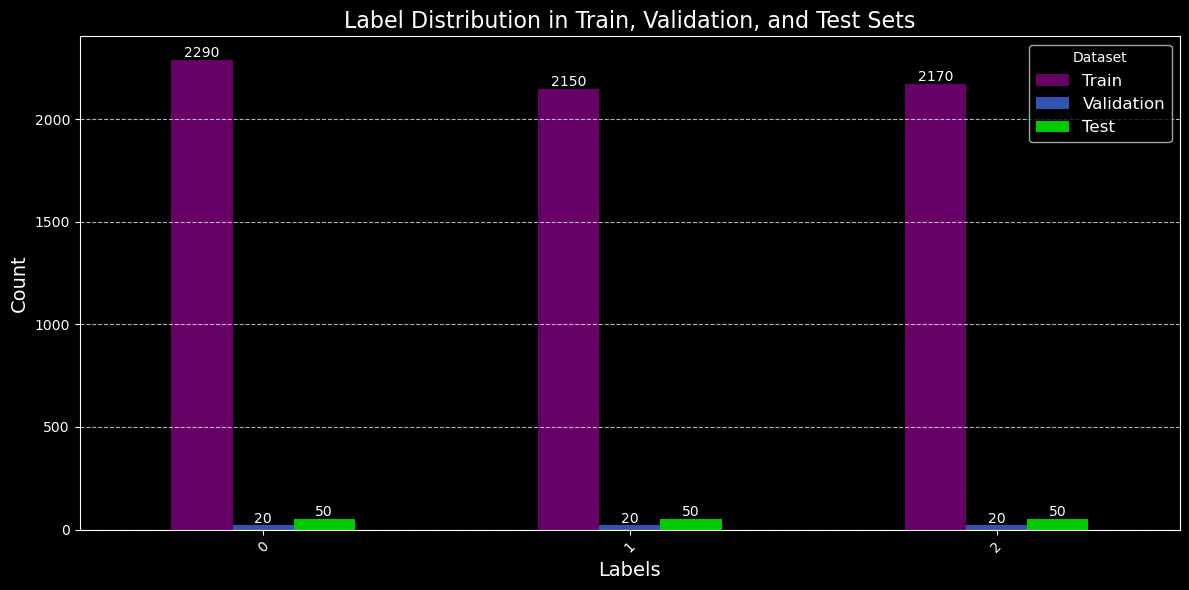

In [16]:
train_label_counts = Train_glcm_df['label'].value_counts()
val_label_counts = Validation_glcm_df['label'].value_counts()
test_label_counts = Test_glcm_df['label'].value_counts()

label_distribution = pd.DataFrame({
    'Train': train_label_counts,
    'Validation': val_label_counts,
    'Test': test_label_counts
})

colors = ['#800080', '#4169e1', '#00ff00']

# Plot the label distribution with customized bar colors
ax = label_distribution.plot(kind='bar', figsize=(12, 6), alpha=0.8, color=colors)

# Add annotations
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',  # The text to display
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Coordinates of the annotation
        ha='center',  # Horizontal alignment
        va='center',  # Vertical alignment
        xytext=(0, 5),  # Offset the text slightly above the bar
        textcoords='offset points',  # Relative offset
        fontsize=10, color='white'
    )

# Add title and labels
plt.title('Label Distribution in Train, Validation, and Test Sets', fontsize=16)
plt.xlabel('Labels', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Dataset', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

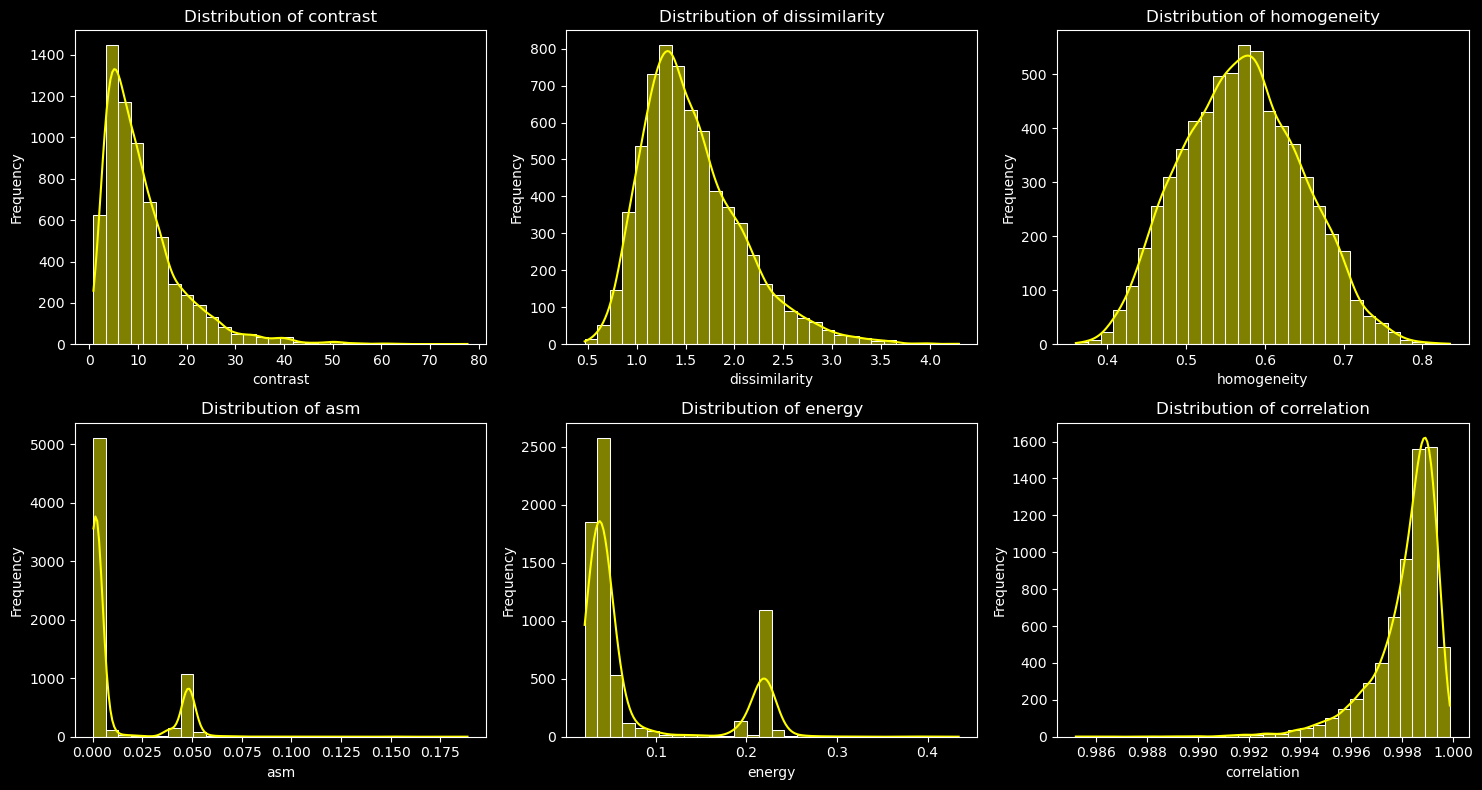

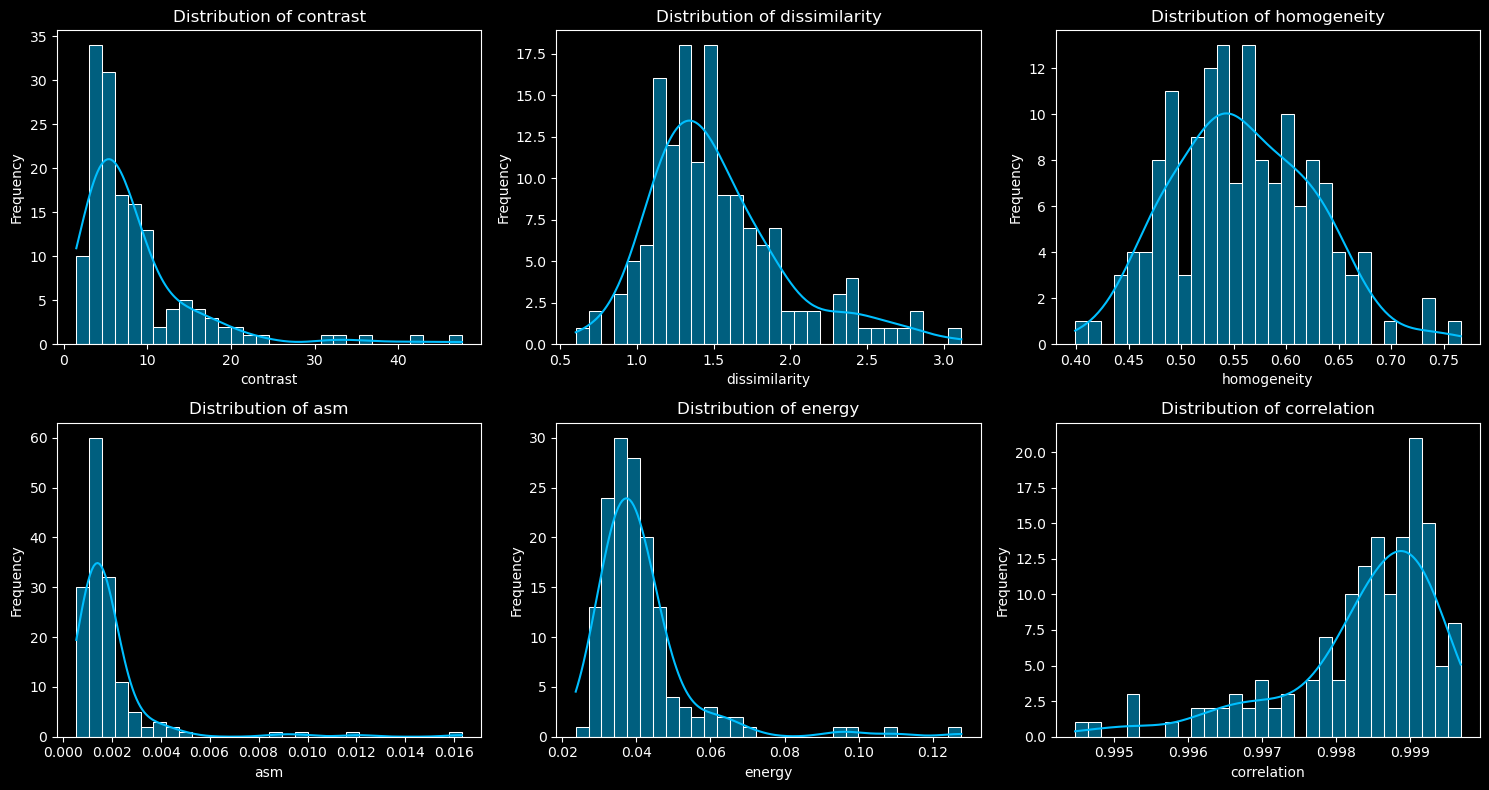

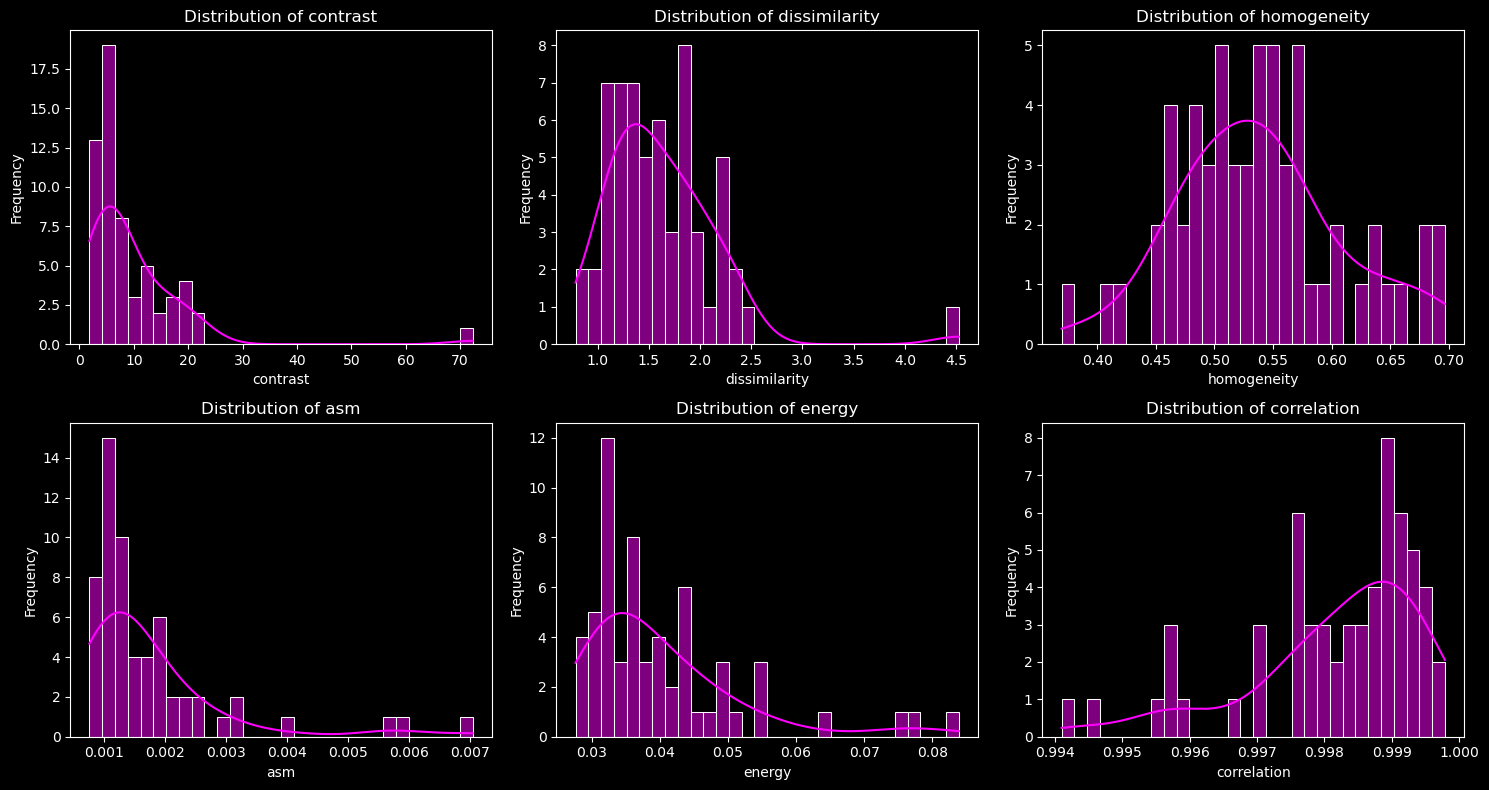

In [18]:
def plot_feature_distributions(data, features, exclude_column=None, rows=2,color='white'):
    # Exclude the specified column if provided
    if exclude_column:
        features = [feature for feature in features if feature != exclude_column]

    # Calculate the number of rows and columns for the subplots
    cols = (len(features) + rows - 1) // rows  # Calculate required columns
    fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
    axes = axes.flatten()  # Flatten axes for easy indexing

    for i, feature in enumerate(features):
        sns.histplot(data[feature], kde=True, bins=30, ax=axes[i], color=color)
        axes[i].set_title(f'Distribution of {feature}', fontsize=12)
        axes[i].set_xlabel(feature, fontsize=10)
        axes[i].set_ylabel('Frequency', fontsize=10)

    # Turn off unused subplots
    for i in range(len(features), len(axes)):
        axes[i].axis('off')

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Use the function on Train_glcm_df
plot_feature_distributions(Train_glcm_df, Train_glcm_df.columns, exclude_column='label', rows=2,color='#ffff00')
plot_feature_distributions(Test_glcm_df, Train_glcm_df.columns, exclude_column='label', rows=2,color='#00bfff')
plot_feature_distributions(Validation_glcm_df, Train_glcm_df.columns, exclude_column='label', rows=2,color='#ff00ff')

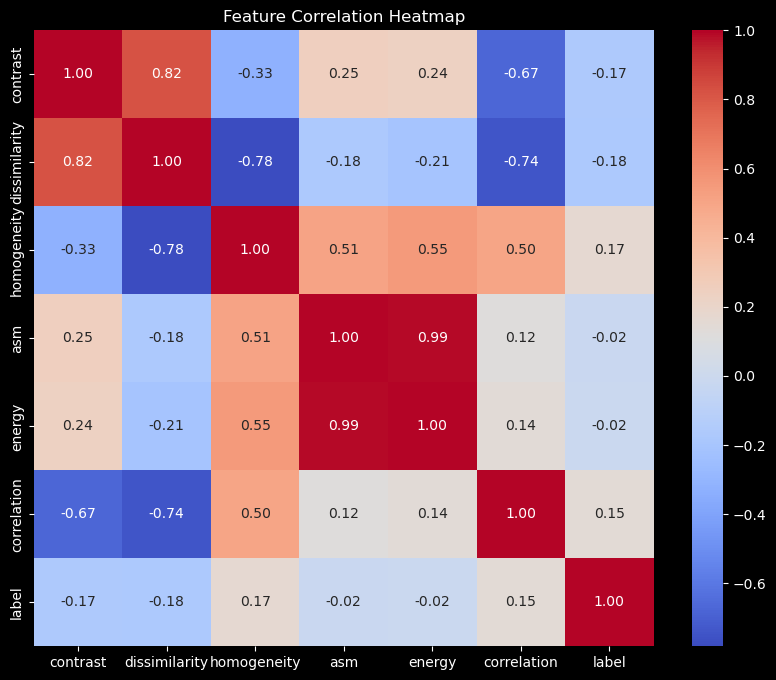

In [19]:
def plot_correlation_heatmap(data):
    correlation_matrix = data.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Feature Correlation Heatmap')
    plt.show()
plot_correlation_heatmap(Train_glcm_df) 

In [5]:

X_train_glcm_df=Train_glcm_df.iloc[:, :-1]
X_val_glcm_df=Validation_glcm_df.iloc[:, :-1]
X_test_glcm_df =Test_glcm_df.iloc[:, :-1]
###########################################
y_train_glcm_df=Train_glcm_df.iloc[:, -1]
y_val_glcm_df=Validation_glcm_df.iloc[:, -1]
y_test_glcm_df =Test_glcm_df.iloc[:, -1] 

print(f"X_train Training Shape for GLCM: {X_train_glcm_df.shape}")
print(f"y_train Training Shape for GLCM: {y_train_glcm_df.shape}")
print(f"X_val Validation Shape for GLCM: {X_val_glcm_df.shape}")
print(f"y_val Validation Shape for GLCM: {y_val_glcm_df.shape}")
print(f"X_test Testing Shape for GLCM: {X_test_glcm_df.shape}")
print(f"y_test Testing Shapefor GLCM: {y_test_glcm_df.shape}")

X_train Training Shape for GLCM: (6610, 6)
y_train Training Shape for GLCM: (6610,)
X_val Validation Shape for GLCM: (60, 6)
y_val Validation Shape for GLCM: (60,)
X_test Testing Shape for GLCM: (150, 6)
y_test Testing Shapefor GLCM: (150,)


In [6]:

def scale_features(X_train, X_val, X_test):
    scaler = StandardScaler()
    
    # Fit the scaler on the training data and transform
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)
    
    # Convert to DataFrame and preserve column names
    X_train_scaled_glcm_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_val_scaled_glcm_df = pd.DataFrame(X_val_scaled, columns=X_val.columns)
    X_test_scaled_glcm_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
    
    return X_train_scaled_glcm_df, X_val_scaled_glcm_df, X_test_scaled_glcm_df
X_train_scaled_glcm_df, X_val_scaled_glcm_df, X_test_scaled_glcm_df=scale_features(X_train_glcm_df, X_val_glcm_df, X_test_glcm_df)
print(f"X_train_scaled shape: {X_train_scaled_glcm_df.shape}")
print(f"X_val_scaled shape: {X_val_scaled_glcm_df.shape}")
print(f"X_test_scaled shape: {X_test_scaled_glcm_df.shape}")

X_train_scaled shape: (6610, 6)
X_val_scaled shape: (60, 6)
X_test_scaled shape: (150, 6)


In [23]:
print(f"X_train_scaled head(2): {X_train_scaled_glcm_df.head(2)}")
print(f"X_val_scaled head(2): {X_val_scaled_glcm_df.head(2)}")
print(f"X_test_scaled head(2): {X_test_scaled_glcm_df.head(2)}")


X_train_scaled head(2):    contrast  dissimilarity  homogeneity       asm    energy  correlation
0 -0.132041       0.338968    -0.979847 -0.556786 -0.696622     0.411239
1 -0.735574      -0.869447     0.932901 -0.502597 -0.489815     0.900469
X_val_scaled head(2):    contrast  dissimilarity  homogeneity       asm    energy  correlation
0 -0.371154       0.502519    -1.570734 -0.547878 -0.655352    -0.138199
1 -0.470774       0.173165    -1.042749 -0.539587 -0.620384    -0.164440
X_test_scaled head(2):    contrast  dissimilarity  homogeneity       asm    energy  correlation
0 -0.579544       0.243725    -1.399013 -0.549235 -0.661364     0.340107
1 -1.036554      -1.265885     1.020599 -0.473479 -0.405020     0.656382


# SVM Trials

[I 2024-12-22 12:44:22,258] A new study created in memory with name: no-name-0e2014c3-b14a-48ff-8db0-3e3fd4ae2470
[I 2024-12-22 12:44:24,048] Trial 0 finished with value: 0.4166666666666667 and parameters: {'C': 0.06419643326681101, 'kernel': 'poly', 'gamma': 'scale', 'degree': 5}. Best is trial 0 with value: 0.4166666666666667.
[I 2024-12-22 12:48:17,108] Trial 1 finished with value: 0.75 and parameters: {'C': 817.4765282871668, 'kernel': 'poly', 'gamma': 'auto', 'degree': 4}. Best is trial 1 with value: 0.75.
[I 2024-12-22 12:48:18,148] Trial 2 finished with value: 0.6333333333333333 and parameters: {'C': 0.02959844668300483, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 1 with value: 0.75.
[I 2024-12-22 12:48:19,928] Trial 3 finished with value: 0.5666666666666667 and parameters: {'C': 0.06429267307312958, 'kernel': 'sigmoid', 'gamma': 'scale'}. Best is trial 1 with value: 0.75.
[I 2024-12-22 12:48:21,461] Trial 4 finished with value: 0.35 and parameters: {'C': 18.182522360619

Best parameters found for SVM: {'C': 815.6364018692122, 'kernel': 'rbf', 'gamma': 'auto'}
Validation accuracy for SVM: 0.7833333333333333
Validation Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        20
           1       0.68      0.95      0.79        20
           2       1.00      0.60      0.75        20

    accuracy                           0.78        60
   macro avg       0.83      0.78      0.78        60
weighted avg       0.83      0.78      0.78        60

Test accuracy for SVM: 0.64
Test Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.57      0.46      0.51        50
           1       0.61      0.82      0.70        50
           2       0.74      0.64      0.69        50

    accuracy                           0.64       150
   macro avg       0.64      0.64      0.63       150
weighted avg       0.64      0.64      0.63      

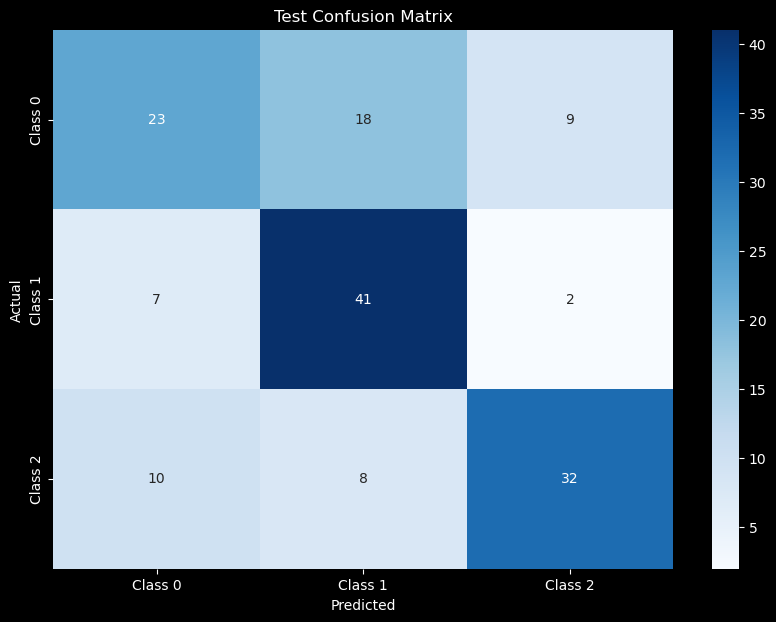

In [22]:
from sklearn.svm import SVC


# Define the objective function for Optuna
def objective_svm(trial):
    # Define the hyperparameter space
    param = {
        "C": trial.suggest_float("C", 1e-3, 1e3, log=True),
        "kernel": trial.suggest_categorical(
            "kernel", ["linear", "poly", "rbf", "sigmoid"]
        ),
        "gamma": trial.suggest_categorical("gamma", ["scale", "auto"]),
    }

    # Add 'degree' only if the kernel is 'poly'
    if param["kernel"] == "poly":
        param["degree"] = trial.suggest_int("degree", 2, 5)

    # Initialize the SVM model
    svm_model = SVC(**param)

    # Train on the training set and validate on the validation set
    svm_model.fit(X_train_scaled_glcm_df, y_train_glcm_df)
    y_val_pred = svm_model.predict(X_val_scaled_glcm_df)
    val_accuracy = accuracy_score(y_val_glcm_df, y_val_pred)

    return val_accuracy


# Create a study object and optimize the objective function
study_svm = optuna.create_study(direction="maximize")
study_svm.optimize(objective_svm, n_trials=350)

# Get the best parameters from the study
best_svm_params = study_svm.best_params
print(f"Best parameters found for SVM: {best_svm_params}")

# Train the final SVM model using the best parameters on the full training set
best_svm_model = SVC(**best_svm_params)
best_svm_model.fit(X_train_scaled_glcm_df, y_train_glcm_df)

# Evaluate the final model on the validation set
y_val_pred_svm = best_svm_model.predict(X_val_scaled_glcm_df)
val_accuracy_svm = accuracy_score(y_val_glcm_df, y_val_pred_svm)
print(f"Validation accuracy for SVM: {val_accuracy_svm}")
print("Validation Classification Report for SVM:")
print(classification_report(y_val_glcm_df, y_val_pred_svm))

# Evaluate the final model on the test set
y_test_pred_svm = best_svm_model.predict(X_test_scaled_glcm_df)
test_accuracy_svm = accuracy_score(y_test_glcm_df, y_test_pred_svm)
print(f"Test accuracy for SVM: {test_accuracy_svm}")
print("Test Classification Report for SVM:")
print(classification_report(y_test_glcm_df, y_test_pred_svm))

# Confusion matrix
cm = confusion_matrix(y_test_glcm_df, y_test_pred_svm)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Class 0", "Class 1", "Class 2"],
    yticklabels=["Class 0", "Class 1", "Class 2"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Test Confusion Matrix")
plt.show()

# Learning Curve for Best Model


c:\Users\bedom\anaconda3\envs\IP\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\bedom\anaconda3\envs\IP\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\bedom\anaconda3\envs\IP\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\bedom\anaconda3\envs\IP\Lib\site-packages\sklearn\svm\_base.py", line 199, in 

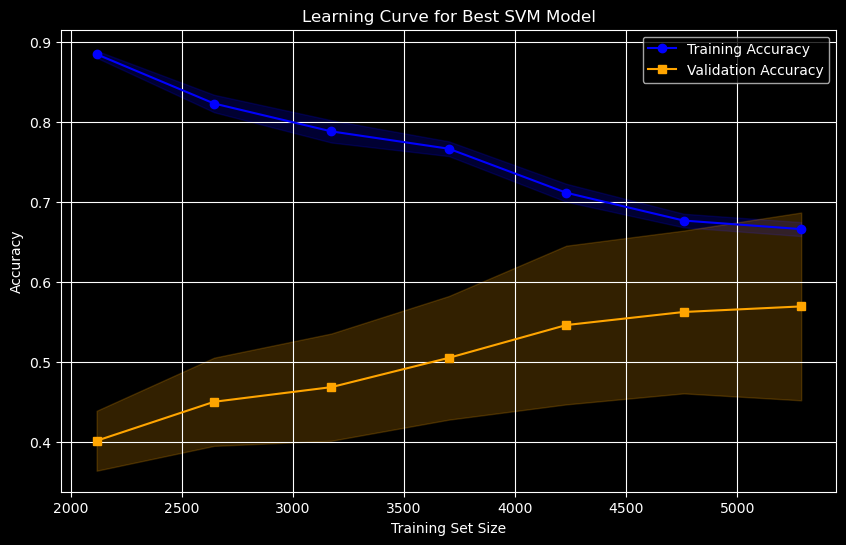

In [23]:
# Define the train sizes (fraction of training data to use)
train_sizes = np.linspace(0.1, 1.0, 10)

# Initialize the best SVM model with the hyperparameters from Optuna
svm_model = SVC(**best_svm_params)

# Compute learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    estimator=svm_model,
    X=X_train_scaled_glcm_df,
    y=y_train_glcm_df,
    train_sizes=train_sizes,
    cv=5,  # 5-fold cross-validation
    scoring="accuracy",
    n_jobs=-1,  # Use all available CPU cores for faster computation
)

# Calculate the mean and standard deviation for training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Accuracy", color="blue", marker="o")
plt.fill_between(
    train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2
)

plt.plot(train_sizes, val_mean, label="Validation Accuracy", color="orange", marker="s")
plt.fill_between(
    train_sizes, val_mean - val_std, val_mean + val_std, color="orange", alpha=0.2
)

plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve for Best SVM Model")
plt.legend(loc="best")
plt.grid(True)
plt.show()

# KNN Trials

* Optuna

[I 2024-12-12 14:31:01,177] A new study created in memory with name: no-name-f2458140-02af-4430-84fa-9812bd750d78
[I 2024-12-12 14:31:01,291] Trial 0 finished with value: 0.5333333333333333 and parameters: {'n_neighbors': 9, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 0 with value: 0.5333333333333333.
[I 2024-12-12 14:31:01,450] Trial 1 finished with value: 0.48333333333333334 and parameters: {'n_neighbors': 1, 'weights': 'uniform', 'metric': 'euclidean'}. Best is trial 0 with value: 0.5333333333333333.
[I 2024-12-12 14:31:01,486] Trial 2 finished with value: 0.7166666666666667 and parameters: {'n_neighbors': 45, 'weights': 'uniform', 'metric': 'manhattan'}. Best is trial 2 with value: 0.7166666666666667.
[I 2024-12-12 14:31:01,518] Trial 3 finished with value: 0.6833333333333333 and parameters: {'n_neighbors': 35, 'weights': 'uniform', 'metric': 'manhattan'}. Best is trial 2 with value: 0.7166666666666667.
[I 2024-12-12 14:31:01,549] Trial 4 finished with value: 0.55 

Best parameters found for KNN: {'n_neighbors': 50, 'weights': 'uniform', 'metric': 'manhattan'}
Validation accuracy for KNN: 0.8
Validation Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        20
           1       0.80      1.00      0.89        20
           2       0.85      0.55      0.67        20

    accuracy                           0.80        60
   macro avg       0.81      0.80      0.79        60
weighted avg       0.81      0.80      0.79        60

Test accuracy for KNN: 0.5533333333333333
Test Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.46      0.38      0.42        50
           1       0.56      0.72      0.63        50
           2       0.62      0.56      0.59        50

    accuracy                           0.55       150
   macro avg       0.55      0.55      0.55       150
weighted avg       0.55      0.55      0.55 

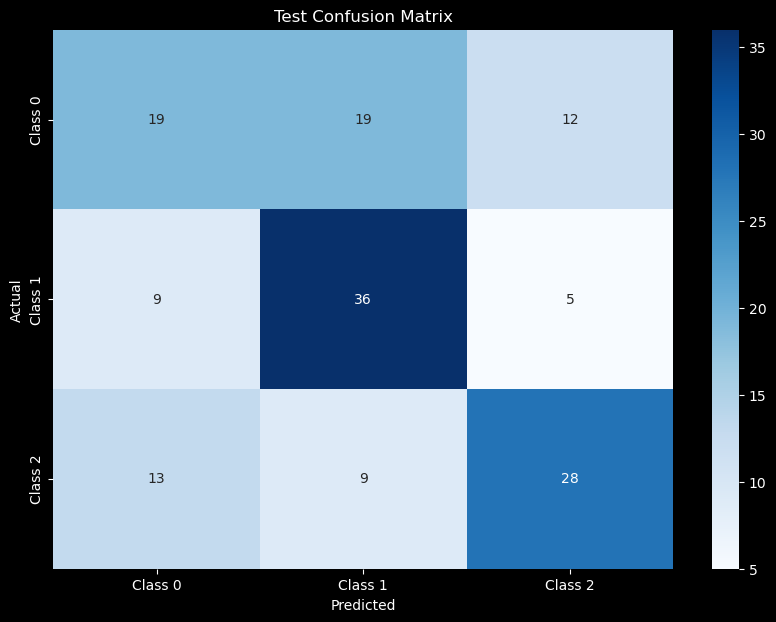

In [32]:
from sklearn.neighbors import KNeighborsClassifier


# Define the objective function for Optuna
def objective_knn(trial):
    # Define the hyperparameter space
    param = {
        'n_neighbors': trial.suggest_int('n_neighbors', 1, 50),
        'weights': trial.suggest_categorical('weights', ['uniform', 'distance']),
        'metric': trial.suggest_categorical('metric', ['euclidean', 'manhattan', 'minkowski']),
    }

    # Initialize the KNN model
    knn_model = KNeighborsClassifier(**param)

    # Train on the training set and validate on the validation set
    knn_model.fit(X_train_scaled_glcm_df, y_train_glcm_df)
    y_val_pred = knn_model.predict(X_val_scaled_glcm_df)
    val_accuracy = accuracy_score(y_val_glcm_df, y_val_pred)
    
    return val_accuracy

# Create a study object and optimize the objective function
study_knn = optuna.create_study(direction='maximize')
study_knn.optimize(objective_knn, n_trials=350)

# Get the best parameters from the study
best_knn_params = study_knn.best_params
print(f"Best parameters found for KNN: {best_knn_params}")

# Train the final KNN model using the best parameters on the full training set
best_knn_model = KNeighborsClassifier(**best_knn_params)
best_knn_model.fit(X_train_scaled_glcm_df, y_train_glcm_df)

# Evaluate the final model on the validation set
y_val_pred_knn = best_knn_model.predict(X_val_scaled_glcm_df)
val_accuracy_knn = accuracy_score(y_val_glcm_df, y_val_pred_knn)
print(f"Validation accuracy for KNN: {val_accuracy_knn}")
print("Validation Classification Report for KNN:")
print(classification_report(y_val_glcm_df, y_val_pred_knn))

# Evaluate the final model on the test set
y_test_pred_knn = best_knn_model.predict(X_test_scaled_glcm_df)
test_accuracy_knn = accuracy_score(y_test_glcm_df, y_test_pred_knn)
print(f"Test accuracy for KNN: {test_accuracy_knn}")
print("Test Classification Report for KNN:")
print(classification_report(y_test_glcm_df, y_test_pred_knn))

cm = confusion_matrix(y_test_glcm_df, y_test_pred_knn)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1','Class 2'], yticklabels=['Class 0', 'Class 1','Class 2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Test Confusion Matrix')
plt.show()


## learning curve for best model 


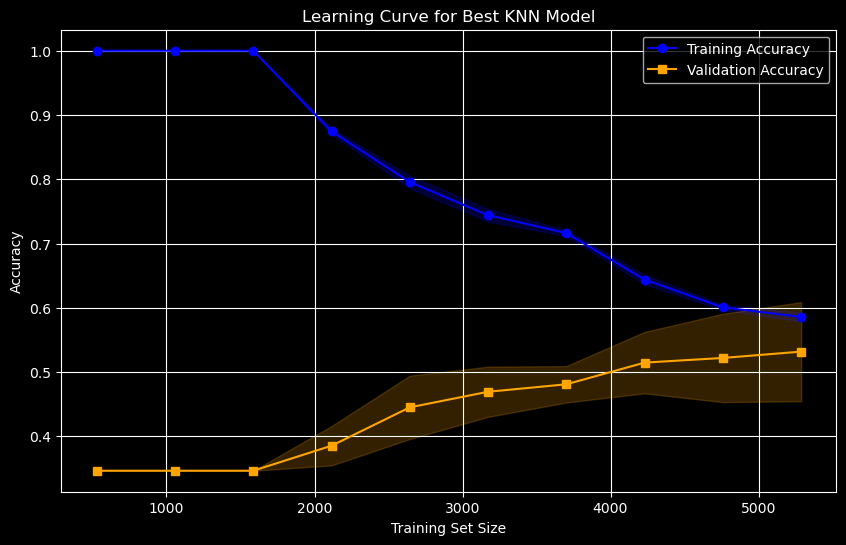

In [33]:
train_sizes = np.linspace(0.1, 1.0, 10)  # Fraction of training data to use

# Using the best KNN model from Optuna
knn_model = KNeighborsClassifier(**best_knn_params)

# Compute learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    estimator=knn_model,
    X=X_train_scaled_glcm_df,
    y=y_train_glcm_df,
    train_sizes=train_sizes,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Calculate mean and standard deviation for training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Accuracy", color='blue', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)

plt.plot(train_sizes, val_mean, label="Validation Accuracy", color='orange', marker='s')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color='orange', alpha=0.2)

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve for Best KNN Model')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Random forest Trials

* Grid search cv first

In [20]:
rf_model = RandomForestClassifier(random_state=42)

# Define parameter grid for GridSearch
param_grid = {
    'n_estimators': [50, 100, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'random_state': [42]
}

# Perform Grid Search with Cross-Validation on training set
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=1, scoring='accuracy', verbose=2)
grid_search.fit(X_train_scaled_glcm_df, y_train_glcm_df)

# Retrieve the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(f"Best parameters found: {best_params}")

# Evaluate the best model on the validation set
y_val_pred = best_model.predict(X_val_scaled_glcm_df)
val_accuracy = accuracy_score(y_val_glcm_df, y_val_pred)
print(f"Validation accuracy: {val_accuracy}")

# Detailed classification report for validation set
print("Validation Classification Report:")
print(classification_report(y_val_glcm_df, y_val_pred))

# Evaluate the final model on the test set
y_test_pred = best_model.predict(X_test_scaled_glcm_df)
test_accuracy = accuracy_score(y_test_glcm_df, y_test_pred)
print(f"Test accuracy: {test_accuracy}")

# Detailed classification report for test set
print("Test Classification Report:")
print(classification_report(y_test_glcm_df, y_test_pred))

# Compute confusion matrix for test set
# cm = confusion_matrix(y_test_glcm_df, y_test_pred)

# # Plot confusion matrix
# plt.figure(figsize=(10, 7))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1','Class 2'], yticklabels=['Class 0', 'Class 1','Class 2'])
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Test Confusion Matrix')
# plt.show()

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42; total time=   0.8s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42; total time=   0.8s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42; total time=   0.7s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42; total time=   0.5s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42; total time=   0.6s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=42; total time=   1.2s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=42; total time=   1.4s
[CV] 

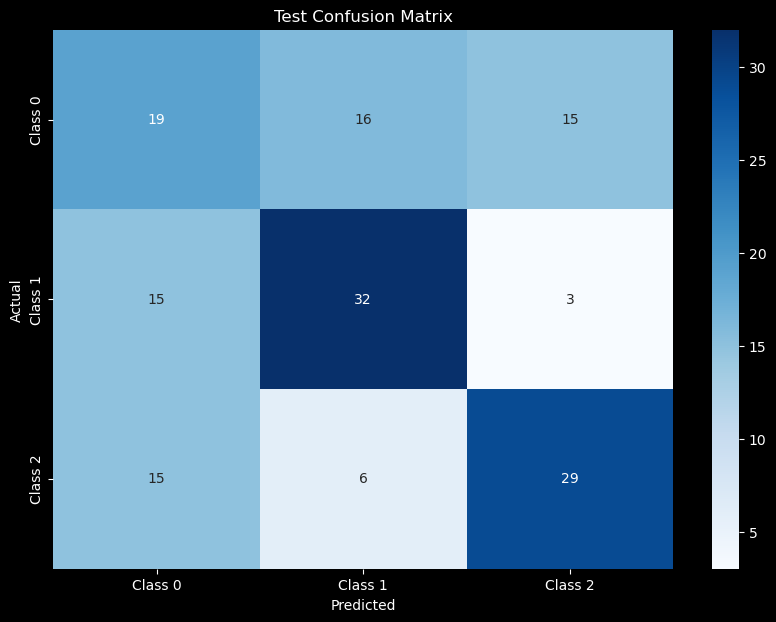

In [23]:
cm = confusion_matrix(y_test_glcm_df, y_test_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1','Class 2'], yticklabels=['Class 0', 'Class 1','Class 2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Test Confusion Matrix')
plt.show()

In [31]:
# # Train the final model using the best parameters
# best_model = RandomForestClassifier(**best_params)

# # Lists to store accuracy at each step
# train_accuracies = []
# val_accuracies = []

# # Manually train the model and evaluate at each iteration
# for n_estimators in range(1, best_params['n_estimators'] + 1):
#     # Train the model with a subset of estimators
#     best_model.set_params(n_estimators=n_estimators)
#     best_model.fit(X_train_scaled_glcm_df, y_train_glcm_df)

#     # Predict on the training set
#     y_train_pred = best_model.predict(X_train_scaled_glcm_df)
#     train_accuracy = accuracy_score(y_train_glcm_df, y_train_pred)
#     train_accuracies.append(train_accuracy)

#     # Predict on the validation set
#     y_val_pred = best_model.predict(X_val_scaled_glcm_df)
#     val_accuracy = accuracy_score(y_val_glcm_df, y_val_pred)
#     val_accuracies.append(val_accuracy)

# # Plot the train-validation learning curve
# plt.figure(figsize=(10, 6))
# plt.plot(range(1, best_params['n_estimators'] + 1), train_accuracies, label='Training Accuracy', marker='o')
# plt.plot(range(1, best_params['n_estimators'] + 1), val_accuracies, label='Validation Accuracy', marker='o')
# plt.xlabel('Number of Estimators')
# plt.ylabel('Accuracy')
# plt.title('Training vs. Validation Accuracy (Learning Curve)')
# plt.legend()
# plt.grid(True)
# plt.show()

# # Final evaluation on the test set
# y_test_pred = best_model.predict(X_test_scaled_glcm_df)
# test_accuracy = accuracy_score(y_test_glcm_df, y_test_pred)
# print(f"Test accuracy: {test_accuracy}")

In [22]:
! pip install optuna
import optuna

   ---------------------------------------- 0.0/364.4 kB ? eta -:--:--
   ---- ---------------------------------- 41.0/364.4 kB 653.6 kB/s eta 0:00:01
   --------- ----------------------------- 92.2/364.4 kB 655.4 kB/s eta 0:00:01
   ------------ ------------------------- 122.9/364.4 kB 654.9 kB/s eta 0:00:01
   -------------- ----------------------- 143.4/364.4 kB 711.9 kB/s eta 0:00:01
   -------------------- ----------------- 194.6/364.4 kB 695.5 kB/s eta 0:00:01
   ----------------------- -------------- 225.3/364.4 kB 689.2 kB/s eta 0:00:01
   -------------------------- ----------- 256.0/364.4 kB 655.4 kB/s eta 0:00:01
   ----------------------------- -------- 286.7/364.4 kB 655.2 kB/s eta 0:00:01
   ---------------------------------- --- 327.7/364.4 kB 655.9 kB/s eta 0:00:01
   -------------------------------------- 364.4/364.4 kB 667.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/233.5 kB ? eta -:--:--
   ----- --------------------------------- 30.7/233.5 kB 4

In [28]:
# Define the objective function for Optuna
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
    }

    # Initialize the Random Forest model
    rf_model = RandomForestClassifier(**param, random_state=42)

    # Train on the training set and validate on the validation set
    rf_model.fit(X_train_scaled_glcm_df, y_train_glcm_df)
    y_val_pred = rf_model.predict(X_val_scaled_glcm_df)
    val_accuracy = accuracy_score(y_val_glcm_df, y_val_pred)
    
    return val_accuracy

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=350)

# Get the best parameters from the study
best_params = study.best_params
print(f"Best parameters found: {best_params}")

# Train the final model using the best parameters on the full training set
best_model = RandomForestClassifier(**best_params, random_state=42)
best_model.fit(X_train_scaled_glcm_df, y_train_glcm_df)

# Evaluate the final model on the validation set
y_val_pred = best_model.predict(X_val_scaled_glcm_df)
val_accuracy = accuracy_score(y_val_glcm_df, y_val_pred)
print(f"Validation accuracy: {val_accuracy}")
print("Validation Classification Report:")
print(classification_report(y_val_glcm_df, y_val_pred))

# Evaluate the final model on the test set
y_test_pred = best_model.predict(X_test_scaled_glcm_df)
test_accuracy = accuracy_score(y_test_glcm_df, y_test_pred)
print(f"Test accuracy: {test_accuracy}")
print("Test Classification Report:")
print(classification_report(y_test_glcm_df, y_test_pred))


[I 2024-12-12 13:56:05,371] A new study created in memory with name: no-name-3af3ff23-9187-4715-8c56-92328c1691ab


[I 2024-12-12 13:56:14,242] Trial 0 finished with value: 0.65 and parameters: {'n_estimators': 360, 'max_depth': 25, 'min_samples_split': 18, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.65.
[I 2024-12-12 13:56:21,022] Trial 1 finished with value: 0.6166666666666667 and parameters: {'n_estimators': 322, 'max_depth': 21, 'min_samples_split': 7, 'min_samples_leaf': 13}. Best is trial 0 with value: 0.65.
[I 2024-12-12 13:56:28,005] Trial 2 finished with value: 0.6833333333333333 and parameters: {'n_estimators': 394, 'max_depth': 27, 'min_samples_split': 15, 'min_samples_leaf': 18}. Best is trial 2 with value: 0.6833333333333333.
[I 2024-12-12 13:56:34,007] Trial 3 finished with value: 0.6333333333333333 and parameters: {'n_estimators': 255, 'max_depth': 25, 'min_samples_split': 8, 'min_samples_leaf': 13}. Best is trial 2 with value: 0.6833333333333333.
[I 2024-12-12 13:56:39,423] Trial 4 finished with value: 0.7 and parameters: {'n_estimators': 429, 'max_depth': 4, 'min_samples_s

Best parameters found: {'n_estimators': 384, 'max_depth': 9, 'min_samples_split': 9, 'min_samples_leaf': 2}
Validation accuracy: 0.7166666666666667
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.75      0.70        20
           1       0.77      1.00      0.87        20
           2       0.73      0.40      0.52        20

    accuracy                           0.72        60
   macro avg       0.72      0.72      0.69        60
weighted avg       0.72      0.72      0.69        60

Test accuracy: 0.6066666666666667
Test Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.46      0.49        50
           1       0.60      0.74      0.66        50
           2       0.70      0.62      0.66        50

    accuracy                           0.61       150
   macro avg       0.61      0.61      0.60       150
weighted avg       0.61      0.61      0.60      

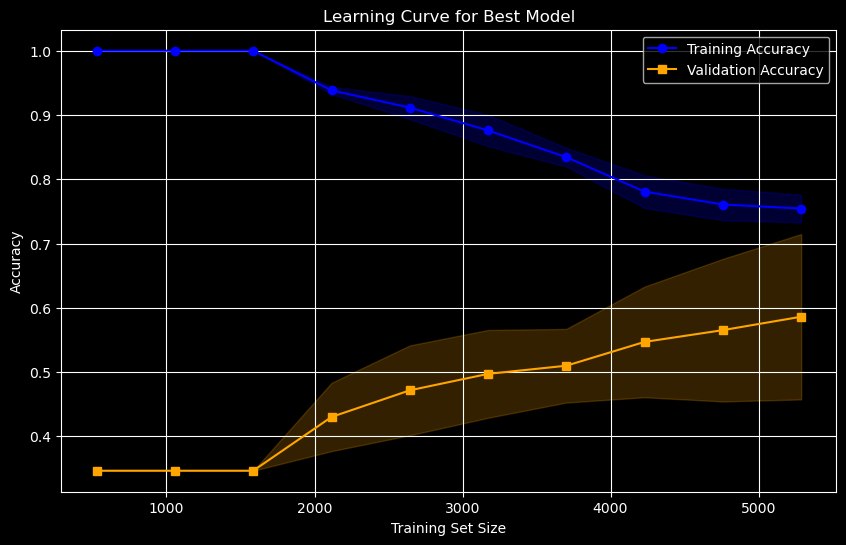

In [29]:
from sklearn.model_selection import learning_curve
# Parameters for the learning curve
train_sizes = np.linspace(0.1, 1.0, 10)  # Fraction of training data to use

# Generate learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    estimator=RandomForestClassifier(**best_params, random_state=42),
    X=X_train_scaled_glcm_df,
    y=y_train_glcm_df,
    train_sizes=train_sizes,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Calculate mean and standard deviation for training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Accuracy", color='blue', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)

plt.plot(train_sizes, val_mean, label="Validation Accuracy", color='orange', marker='s')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color='orange', alpha=0.2)

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve for Best Model')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Xgboost Trials

## **_Lbp DataSet_**

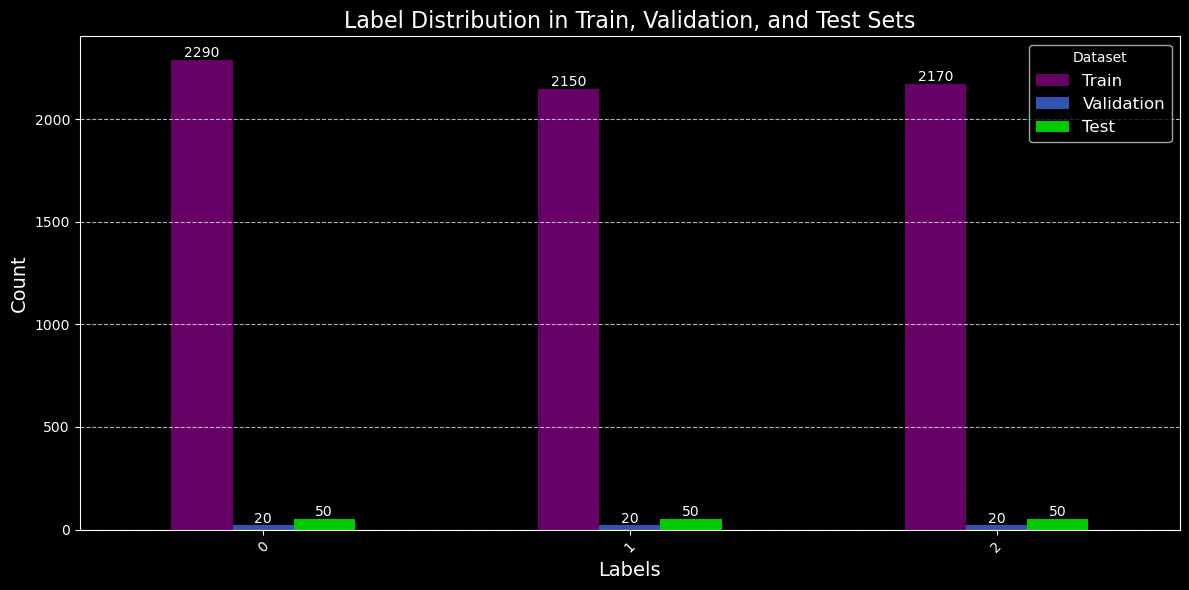

In [24]:
train_label_counts = Train_lbp_df['label'].value_counts()
val_label_counts = Validation_lbp_df['label'].value_counts()
test_label_counts = Test_lbp_df['label'].value_counts()

label_distribution = pd.DataFrame({
    'Train': train_label_counts,
    'Validation': val_label_counts,
    'Test': test_label_counts
})

colors = ['#800080', '#4169e1', '#00ff00']

ax = label_distribution.plot(kind='bar', figsize=(12, 6), alpha=0.8, color=colors)

for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',  # The text to display
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Coordinates of the annotation
        ha='center',  # Horizontal alignment
        va='center',  # Vertical alignment
        xytext=(0, 5),  # Offset the text slightly above the bar
        textcoords='offset points',  # Relative offset
        fontsize=10, color='white'
    )

# Add title and labels
plt.title('Label Distribution in Train, Validation, and Test Sets', fontsize=16)
plt.xlabel('Labels', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Dataset', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [8]:

X_train_lbp_df = Train_lbp_df.iloc[:, :-1]
X_val_lbp_df = Validation_lbp_df.iloc[:, :-1]
X_test_lbp_df = Test_lbp_df.iloc[:, :-1]

y_train_lbp_df = Train_lbp_df.iloc[:, -1]
y_val_lbp_df = Validation_lbp_df.iloc[:, -1]
y_test_lbp_df = Test_lbp_df.iloc[:, -1]

print(f"X_train shape: {X_train_lbp_df.shape}")
print(f"y_train shape: {y_train_lbp_df.shape}")
print(f"X_val shape: {X_val_lbp_df.shape}")
print(f"y_val shape: {y_val_lbp_df.shape}")
print(f"X_test shape: {X_test_lbp_df.shape}")
print(f"y_test shape: {y_test_lbp_df.shape}")

X_train shape: (6610, 256)
y_train shape: (6610,)
X_val shape: (60, 256)
y_val shape: (60,)
X_test shape: (150, 256)
y_test shape: (150,)


In [9]:

def scale_features(X_train, X_val, X_test):
    scaler = StandardScaler()
    
    # Fit the scaler on the training data and transform
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)
    
    # Convert to DataFrame and preserve column names
    X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=X_val.columns)
    X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
    
    return X_train_scaled_df, X_val_scaled_df, X_test_scaled_df
X_train_scaled_lbp_df, X_val_scaled_lbp_df, X_test_scaled_lbp_df=scale_features(X_train_lbp_df, X_val_lbp_df, X_test_lbp_df)
print(f"X_train_scaled shape: {X_train_scaled_lbp_df.shape}")
print(f"X_val_scaled shape: {X_val_scaled_lbp_df.shape}")
print(f"X_test_scaled shape: {X_test_scaled_lbp_df.shape}")

X_train_scaled shape: (6610, 256)
X_val_scaled shape: (60, 256)
X_test_scaled shape: (150, 256)


In [29]:
print(f"X_train_scaled head(2): {X_train_scaled_lbp_df.head(2)}")
print(f"X_val_scaled head(2): {X_val_scaled_lbp_df.head(2)}")
print(f"X_test_scaled head(2): {X_test_scaled_lbp_df.head(2)}")


X_train_scaled head(2):    LBP_Bin_0  LBP_Bin_1  LBP_Bin_2  LBP_Bin_3  LBP_Bin_4  LBP_Bin_5  \
0   0.132786   0.453197  -0.009655   0.592700   0.265447   0.752325   
1  -1.009242  -0.634444  -0.640226  -0.773447  -0.593759  -0.776574   

   LBP_Bin_6  LBP_Bin_7  LBP_Bin_8  LBP_Bin_9  ...  LBP_Bin_246  LBP_Bin_247  \
0    0.49858   1.019114   0.128740   0.068649  ...     0.203613     1.864478   
1   -0.81321   0.047446  -0.772873  -1.098499  ...     0.235752    -0.759829   

   LBP_Bin_248  LBP_Bin_249  LBP_Bin_250  LBP_Bin_251  LBP_Bin_252  \
0     1.058733    -0.412469     0.282441     1.085947     0.281980   
1    -0.538631    -0.739009    -1.029764    -0.097453     0.441037   

   LBP_Bin_253  LBP_Bin_254  LBP_Bin_255  
0     0.334268    -0.760235          0.0  
1    -0.960599     0.466205          0.0  

[2 rows x 256 columns]
X_val_scaled head(2):    LBP_Bin_0  LBP_Bin_1  LBP_Bin_2  LBP_Bin_3  LBP_Bin_4  LBP_Bin_5  \
0   2.109020   1.331376   1.142583   1.781103   1.665157   1.959

* Applying PCA

Number of Components: 1, Cumulative Explained Variance Ratio: 0.6037, Approx. AIC: 45442.7686
Number of Components: 2, Cumulative Explained Variance Ratio: 0.7753, Approx. AIC: 42517.1822
Number of Components: 3, Cumulative Explained Variance Ratio: 0.8576, Approx. AIC: 40506.0965
Number of Components: 4, Cumulative Explained Variance Ratio: 0.9062, Approx. AIC: 38970.7646
Number of Components: 5, Cumulative Explained Variance Ratio: 0.9165, Approx. AIC: 37572.2425
Number of Components: 6, Cumulative Explained Variance Ratio: 0.9256, Approx. AIC: 36434.4881
Number of Components: 7, Cumulative Explained Variance Ratio: 0.9322, Approx. AIC: 35464.7572
Number of Components: 8, Cumulative Explained Variance Ratio: 0.9374, Approx. AIC: 34620.9680
Number of Components: 9, Cumulative Explained Variance Ratio: 0.9421, Approx. AIC: 33877.4618
Number of Components: 10, Cumulative Explained Variance Ratio: 0.9463, Approx. AIC: 33211.9886
Number of Components: 11, Cumulative Explained Variance Rat

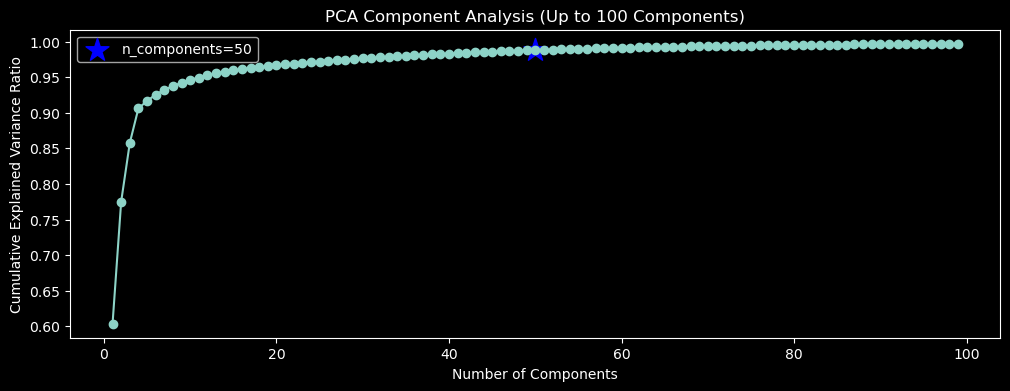

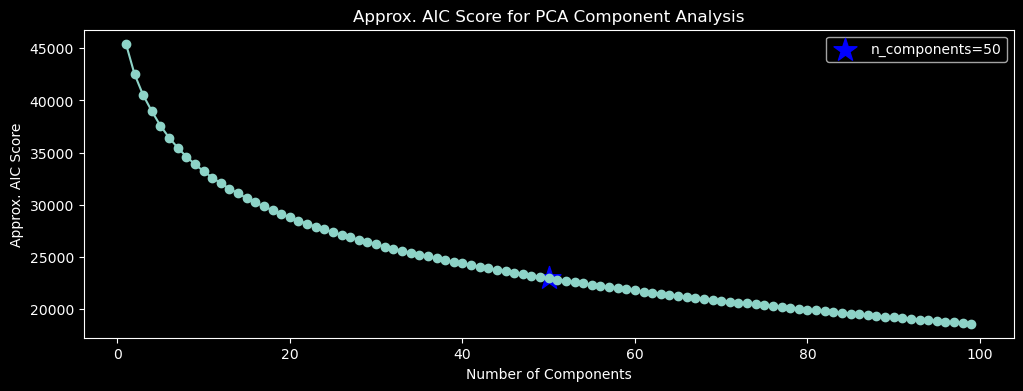

PCA transformed data converted to DataFrame.
Shape of X_train_pca_lbp_df: (6610, 50)
Shape of X_val_pca_lbp_df: (60, 50)
Shape of X_test_pca_lbp_df: (150, 50)


In [30]:
from sklearn.decomposition import PCA
n_components = np.arange(1, 100)  # Testing up to 12 components
explained_variance_ratios = []
aic_scores = []

for n in n_components:
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train_scaled_lbp_df)  # Fit PCA only on the training set
    
    cum_explained_variance = np.sum(pca.explained_variance_ratio_)
    explained_variance_ratios.append(cum_explained_variance)

    # Calculate approximate AIC score
    k = n
    log_likelihood = -0.5 * X_train_scaled_lbp_df.shape[0] * np.log(2 * np.pi * np.mean(pca.explained_variance_))
    aic = 2 * k - 2 * log_likelihood
    aic_scores.append(aic)

    print(f"Number of Components: {n}, Cumulative Explained Variance Ratio: {cum_explained_variance:.4f}, Approx. AIC: {aic:.4f}")

# Step 3: Plot explained variance
plt.figure(figsize=(12, 4))
plt.plot(n_components, explained_variance_ratios, marker='o')
plt.scatter(50, explained_variance_ratios[49], c='b', marker='*', label="n_components=50", s=300)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA Component Analysis (Up to 100 Components)')
plt.legend()
plt.show()

# Plot AIC scores
plt.figure(figsize=(12, 4))
plt.plot(n_components, aic_scores, marker='o')
plt.scatter(50, aic_scores[49], c='b', marker='*', label="n_components=50", s=300)
plt.xlabel('Number of Components')
plt.ylabel('Approx. AIC Score')
plt.title('Approx. AIC Score for PCA Component Analysis')
plt.legend()
plt.show()

optimal_n_components = 50  # Update this based on your analysis
pca = PCA(n_components=optimal_n_components)

# Apply PCA transformation only using the training fit
X_train_pca_lbp_df = pca.fit_transform(X_train_scaled_lbp_df)
X_val_pca_lbp_df = pca.transform(X_val_scaled_lbp_df)  # Apply transformation to validation
X_test_pca_lbp_df= pca.transform(X_test_scaled_lbp_df)  # Apply transformation to test

# Convert the NumPy arrays to DataFrame
X_train_pca_lbp_df = pd.DataFrame(X_train_pca_lbp_df)
X_val_pca_lbp_df = pd.DataFrame(X_val_pca_lbp_df)
X_test_pca_lbp_df = pd.DataFrame(X_test_pca_lbp_df)

# Now they are DataFrames and ready for use with pandas workflows
print("PCA transformed data converted to DataFrame.")
# Print the shapes
print("Shape of X_train_pca_lbp_df:", X_train_pca_lbp_df.shape)
print("Shape of X_val_pca_lbp_df:", X_val_pca_lbp_df.shape)
print("Shape of X_test_pca_lbp_df:", X_test_pca_lbp_df.shape)


# **_Knn Trials_**

[I 2024-12-12 15:25:39,224] A new study created in memory with name: no-name-e0a5aba4-4105-495e-a70d-90b7fba3fdfe
[I 2024-12-12 15:25:40,087] Trial 0 finished with value: 0.85 and parameters: {'n_neighbors': 33, 'weights': 'uniform', 'metric': 'manhattan'}. Best is trial 0 with value: 0.85.
[I 2024-12-12 15:25:40,118] Trial 1 finished with value: 0.8 and parameters: {'n_neighbors': 4, 'weights': 'distance', 'metric': 'minkowski'}. Best is trial 0 with value: 0.85.
[I 2024-12-12 15:25:40,151] Trial 2 finished with value: 0.85 and parameters: {'n_neighbors': 15, 'weights': 'uniform', 'metric': 'euclidean'}. Best is trial 0 with value: 0.85.
[I 2024-12-12 15:25:40,176] Trial 3 finished with value: 0.8333333333333334 and parameters: {'n_neighbors': 25, 'weights': 'distance', 'metric': 'euclidean'}. Best is trial 0 with value: 0.85.
[I 2024-12-12 15:25:40,211] Trial 4 finished with value: 0.8166666666666667 and parameters: {'n_neighbors': 21, 'weights': 'uniform', 'metric': 'minkowski'}. Be

Best parameters found for KNN: {'n_neighbors': 25, 'weights': 'distance', 'metric': 'manhattan'}
Validation accuracy for KNN: 0.9
Validation Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90        20
           1       0.86      0.90      0.88        20
           2       1.00      0.85      0.92        20

    accuracy                           0.90        60
   macro avg       0.91      0.90      0.90        60
weighted avg       0.91      0.90      0.90        60

Test accuracy for KNN: 0.76
Test Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.64      0.76      0.70        50
           1       0.73      0.80      0.76        50
           2       1.00      0.72      0.84        50

    accuracy                           0.76       150
   macro avg       0.79      0.76      0.77       150
weighted avg       0.79      0.76      0.77       150



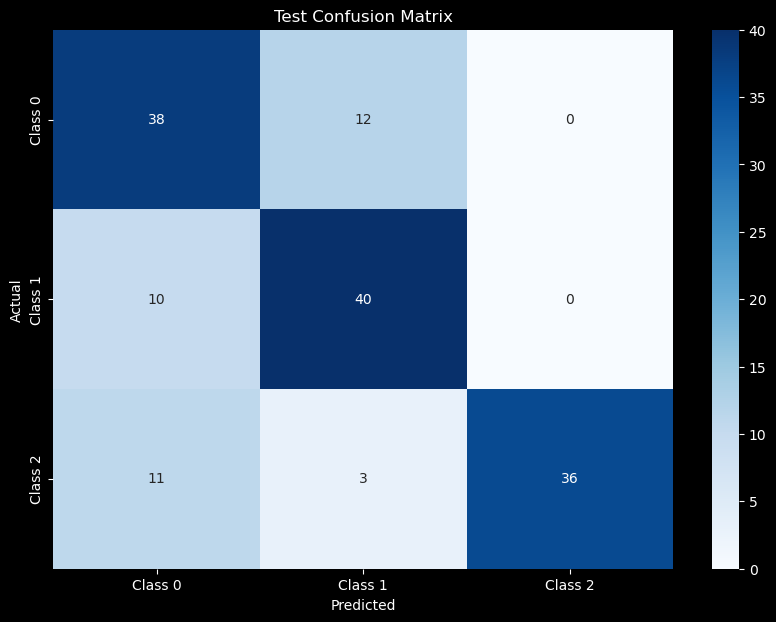

In [44]:
from sklearn.neighbors import KNeighborsClassifier


# Define the objective function for Optuna
def objective_knn(trial):
    # Define the hyperparameter space
    param = {
        'n_neighbors': trial.suggest_int('n_neighbors', 1, 50),
        'weights': trial.suggest_categorical('weights', ['uniform', 'distance']),
        'metric': trial.suggest_categorical('metric', ['euclidean', 'manhattan', 'minkowski']),
    }

    # Initialize the KNN model
    knn_model = KNeighborsClassifier(**param)

    # Train on the training set and validate on the validation set
    knn_model.fit(X_train_pca_lbp_df, y_train_lbp_df)
    y_val_pred = knn_model.predict(X_val_pca_lbp_df)
    val_accuracy = accuracy_score(y_val_lbp_df, y_val_pred)
    
    return val_accuracy

# Create a study object and optimize the objective function
study_knn = optuna.create_study(direction='maximize')
study_knn.optimize(objective_knn, n_trials=350)

# Get the best parameters from the study
best_knn_params = study_knn.best_params
print(f"Best parameters found for KNN: {best_knn_params}")

# Train the final KNN model using the best parameters on the full training set
best_knn_model = KNeighborsClassifier(**best_knn_params)
best_knn_model.fit(X_train_pca_lbp_df, y_train_lbp_df)

# Evaluate the final model on the validation set
y_val_pred_knn = best_knn_model.predict(X_val_pca_lbp_df)
val_accuracy_knn = accuracy_score(y_val_lbp_df, y_val_pred_knn)
print(f"Validation accuracy for KNN: {val_accuracy_knn}")
print("Validation Classification Report for KNN:")
print(classification_report(y_val_lbp_df, y_val_pred_knn))

# Evaluate the final model on the test set
y_test_pred_knn = best_knn_model.predict(X_test_pca_lbp_df)
test_accuracy_knn = accuracy_score(y_test_lbp_df, y_test_pred_knn)
print(f"Test accuracy for KNN: {test_accuracy_knn}")
print("Test Classification Report for KNN:")
print(classification_report(y_test_lbp_df, y_test_pred_knn))

cm = confusion_matrix(y_test_lbp_df, y_test_pred_knn)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1','Class 2'], yticklabels=['Class 0', 'Class 1','Class 2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Test Confusion Matrix')
plt.show()


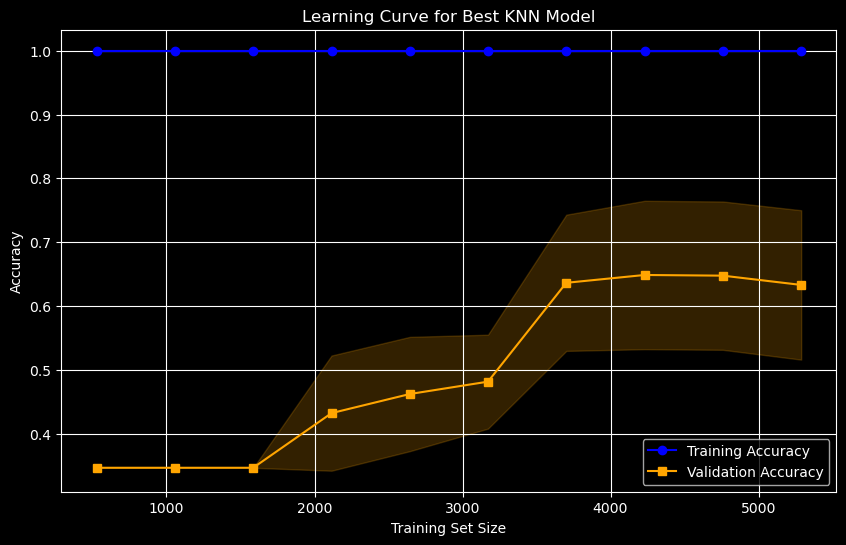

In [45]:
train_sizes = np.linspace(0.1, 1.0, 10)  # Fraction of training data to use

# Using the best KNN model from Optuna
knn_model = KNeighborsClassifier(**best_knn_params)

# Compute learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    estimator=knn_model,
    X=X_train_pca_lbp_df,
    y=y_train_lbp_df,
    train_sizes=train_sizes,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Calculate mean and standard deviation for training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Accuracy", color='blue', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)

plt.plot(train_sizes, val_mean, label="Validation Accuracy", color='orange', marker='s')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color='orange', alpha=0.2)

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve for Best KNN Model')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# **_Random Forest Trials_** 

In [46]:
# Define the objective function for Optuna
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
    }

    # Initialize the Random Forest model
    rf_model = RandomForestClassifier(**param, random_state=42)

    # Train on the training set and validate on the validation set
    rf_model.fit(X_train_pca_lbp_df, y_train_lbp_df)
    y_val_pred = rf_model.predict(X_val_pca_lbp_df)
    val_accuracy = accuracy_score(y_val_lbp_df, y_val_pred)
    
    return val_accuracy

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=350)

# Get the best parameters from the study
best_params_rf = study.best_params
print(f"Best parameters found: {best_params_rf}")

# # Train the final model using the best parameters on the full training set
# best_model_rf = RandomForestClassifier(**best_params_rf, random_state=42)
# best_model_rf.fit(X_train_pca_lbp_df, y_train_lbp_df)

# # Evaluate the final model on the validation set
# y_val_pred_rf = best_model_rf.predict(X_val_pca_lbp_df)
# val_accuracy_rf = accuracy_score(y_val_lbp_df, y_val_pred_rf)
# print(f"Validation accuracy: {val_accuracy_rf}")
# print("Validation Classification Report:")
# print(classification_report(y_val_lbp_df, y_val_pred_rf))

# # Evaluate the final model on the test set
# y_test_pred_rf = best_model.predict(X_test_pca_lbp_df)
# test_accuracy_rf = accuracy_score(y_test_lbp_df, y_test_pred_rf)
# print(f"Test accuracy Rf: {test_accuracy_rf}")
# print("Test Classification Report:")
# print(classification_report(y_test_lbp_df, y_test_pred_rf))

# cm = confusion_matrix(y_test_lbp_df, y_test_pred_rf)

# # Plot confusion matrix
# plt.figure(figsize=(10, 7))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1','Class 2'], yticklabels=['Class 0', 'Class 1','Class 2'])
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Test Confusion Matrix')
# plt.show()

[I 2024-12-12 15:33:50,560] A new study created in memory with name: no-name-c5b83a91-5c7e-4b87-8bea-25b6eb0ef132
[I 2024-12-12 15:34:02,639] Trial 0 finished with value: 0.7166666666666667 and parameters: {'n_estimators': 339, 'max_depth': 5, 'min_samples_split': 13, 'min_samples_leaf': 12}. Best is trial 0 with value: 0.7166666666666667.
[I 2024-12-12 15:34:19,969] Trial 1 finished with value: 0.8 and parameters: {'n_estimators': 336, 'max_depth': 30, 'min_samples_split': 8, 'min_samples_leaf': 20}. Best is trial 1 with value: 0.8.
[I 2024-12-12 15:34:38,399] Trial 2 finished with value: 0.7666666666666667 and parameters: {'n_estimators': 378, 'max_depth': 21, 'min_samples_split': 14, 'min_samples_leaf': 20}. Best is trial 1 with value: 0.8.
[I 2024-12-12 15:34:52,293] Trial 3 finished with value: 0.8 and parameters: {'n_estimators': 273, 'max_depth': 19, 'min_samples_split': 20, 'min_samples_leaf': 13}. Best is trial 1 with value: 0.8.
[I 2024-12-12 15:35:02,410] Trial 4 finished wi

Best parameters found: {'n_estimators': 468, 'max_depth': 29, 'min_samples_split': 5, 'min_samples_leaf': 2}


c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 50 features, but RandomForestClassifier is expecting 6 features as input.

Validation accuracy: 0.85
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        20
           1       0.83      0.95      0.88        20
           2       0.94      0.75      0.83        20

    accuracy                           0.85        60
   macro avg       0.86      0.85      0.85        60
weighted avg       0.86      0.85      0.85        60

Test accuracy Rf: 0.7733333333333333
Test Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.82      0.73        50
           1       0.78      0.84      0.81        50
           2       0.97      0.66      0.79        50

    accuracy                           0.77       150
   macro avg       0.80      0.77      0.78       150
weighted avg       0.80      0.77      0.78       150



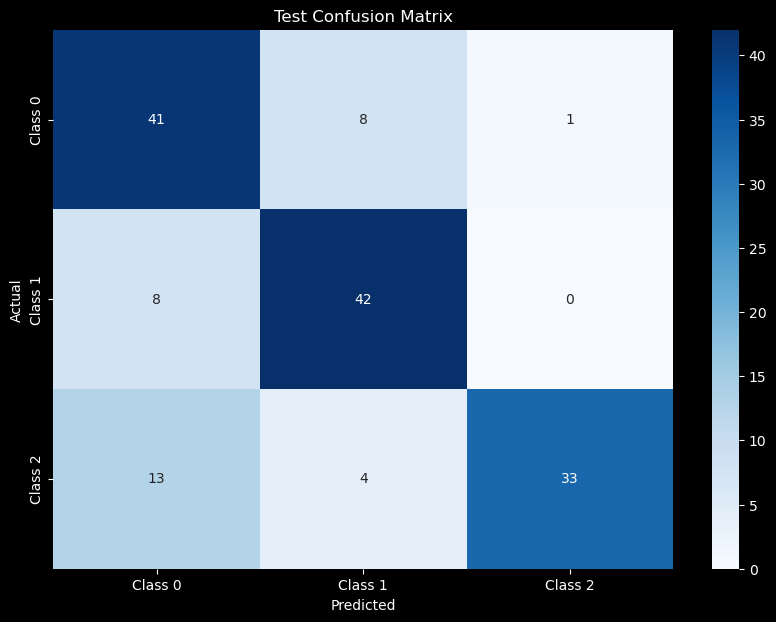

In [50]:
# Train the final model using the best parameters on the full training set
best_model_rf = RandomForestClassifier(**best_params_rf, random_state=42)
best_model_rf.fit(X_train_pca_lbp_df, y_train_lbp_df)

# Evaluate the final model on the validation set
y_val_pred_rf = best_model_rf.predict(X_val_pca_lbp_df)
val_accuracy_rf = accuracy_score(y_val_lbp_df, y_val_pred_rf)
print(f"Validation accuracy: {val_accuracy_rf}")
print("Validation Classification Report:")
print(classification_report(y_val_lbp_df, y_val_pred_rf))

# Evaluate the final model on the test set
y_test_pred_rf = best_model_rf.predict(X_test_pca_lbp_df)
test_accuracy_rf = accuracy_score(y_test_lbp_df, y_test_pred_rf)
print(f"Test accuracy Rf: {test_accuracy_rf}")
print("Test Classification Report:")
print(classification_report(y_test_lbp_df, y_test_pred_rf))

cm = confusion_matrix(y_test_lbp_df, y_test_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1','Class 2'], yticklabels=['Class 0', 'Class 1','Class 2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Test Confusion Matrix')
plt.show()

In [52]:
best_model_rf

RandomForestClassifier(max_depth=29, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=468, random_state=42)

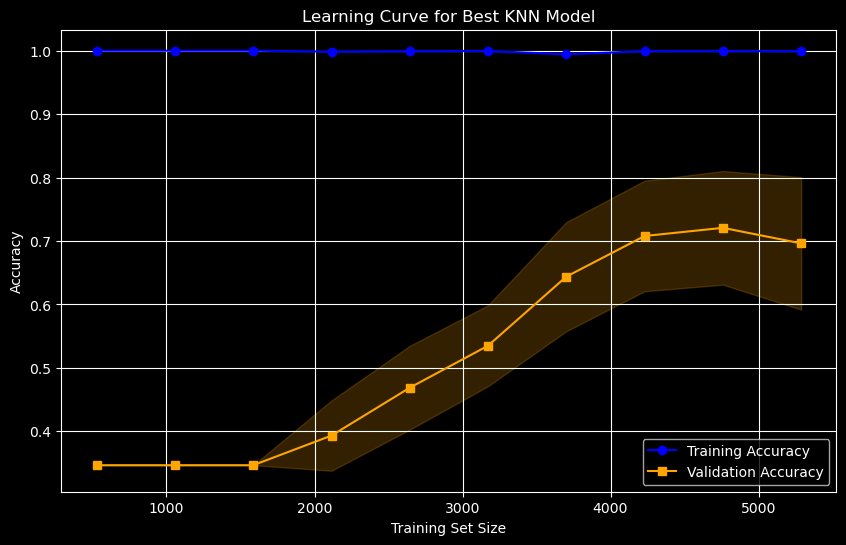

In [51]:
train_sizes = np.linspace(0.1, 1.0, 10)  # Fraction of training data to use

# Compute learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    estimator=best_model_rf,
    X=X_train_pca_lbp_df,
    y=y_train_lbp_df,
    train_sizes=train_sizes,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
)

# Calculate mean and standard deviation for training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Accuracy", color="blue", marker="o")
plt.fill_between(
    train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2
)

plt.plot(train_sizes, val_mean, label="Validation Accuracy", color="orange", marker="s")
plt.fill_between(
    train_sizes, val_mean - val_std, val_mean + val_std, color="orange", alpha=0.2
)

plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve for Best Rf Model")
plt.legend(loc="best")
plt.grid(True)
plt.show()

# SVM Trials

[I 2024-12-22 14:45:20,872] A new study created in memory with name: no-name-50e90349-7d3a-41e8-b850-64d0a1ad9389
C:\Users\bedom\AppData\Local\Temp\ipykernel_14644\2607160783.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
[I 2024-12-22 14:45:21,849] Trial 0 finished with value: 0.5166666666666667 and parameters: {'C': 217.2852310168921, 'kernel': 'sigmoid', 'gamma': 'scale'}. Best is trial 0 with value: 0.5166666666666667.
C:\Users\bedom\AppData\Local\Temp\ipykernel_14644\2607160783.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-3, 1e3),
[I 2024-12-22 14:45:22,850] Trial 1 f

Best parameters found for SVM: {'C': 0.026665804466964024, 'kernel': 'poly', 'gamma': 'auto'}
Validation accuracy for SVM: 0.8833333333333333
Validation Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.79      0.95      0.86        20
           1       0.90      0.95      0.93        20
           2       1.00      0.75      0.86        20

    accuracy                           0.88        60
   macro avg       0.90      0.88      0.88        60
weighted avg       0.90      0.88      0.88        60

Test accuracy for SVM: 0.72
Test Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.59      0.88      0.70        50
           1       0.75      0.66      0.70        50
           2       1.00      0.62      0.77        50

    accuracy                           0.72       150
   macro avg       0.78      0.72      0.72       150
weighted avg       0.78      0.72      0.72  

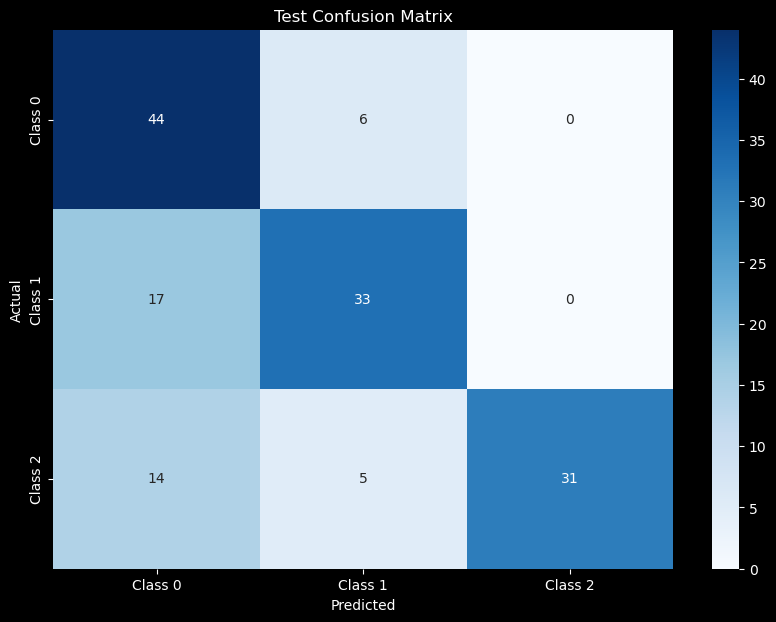

In [29]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import optuna


# Define the objective function for Optuna
def objective_svm(trial):
    # Define the hyperparameter space
    param = {
        "C": trial.suggest_loguniform("C", 1e-3, 1e3),
        "kernel": trial.suggest_categorical(
            "kernel", ["linear", "poly", "rbf", "sigmoid"]
        ),
        "gamma": trial.suggest_categorical("gamma", ["scale", "auto"]),
    }

    # Initialize the SVM model
    svm_model = SVC(**param)

    # Train on the training set and validate on the validation set
    svm_model.fit(X_train_pca_lbp_df, y_train_lbp_df)
    y_val_pred = svm_model.predict(X_val_pca_lbp_df)
    val_accuracy = accuracy_score(y_val_lbp_df, y_val_pred)

    return val_accuracy


# Create a study object and optimize the objective function
study_svm = optuna.create_study(direction="maximize")
study_svm.optimize(objective_svm, n_trials=350)

# Get the best parameters from the study
best_svm_params = study_svm.best_params
print(f"Best parameters found for SVM: {best_svm_params}")

# Train the final SVM model using the best parameters on the full training set
best_svm_model = SVC(**best_svm_params)
best_svm_model.fit(X_train_pca_lbp_df, y_train_lbp_df)

# Evaluate the final model on the validation set
y_val_pred_svm = best_svm_model.predict(X_val_pca_lbp_df)
val_accuracy_svm = accuracy_score(y_val_lbp_df, y_val_pred_svm)
print(f"Validation accuracy for SVM: {val_accuracy_svm}")
print("Validation Classification Report for SVM:")
print(classification_report(y_val_lbp_df, y_val_pred_svm))

# Evaluate the final model on the test set
y_test_pred_svm = best_svm_model.predict(X_test_pca_lbp_df)
test_accuracy_svm = accuracy_score(y_test_lbp_df, y_test_pred_svm)
print(f"Test accuracy for SVM: {test_accuracy_svm}")
print("Test Classification Report for SVM:")
print(classification_report(y_test_lbp_df, y_test_pred_svm))

cm = confusion_matrix(y_test_lbp_df, y_test_pred_svm)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Class 0", "Class 1", "Class 2"],
    yticklabels=["Class 0", "Class 1", "Class 2"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Test Confusion Matrix")
plt.show()

# Detect the learning rate

c:\Users\bedom\anaconda3\envs\IP\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\bedom\anaconda3\envs\IP\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\bedom\anaconda3\envs\IP\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\bedom\anaconda3\envs\IP\Lib\site-packages\sklearn\svm\_base.py", line 199, in 

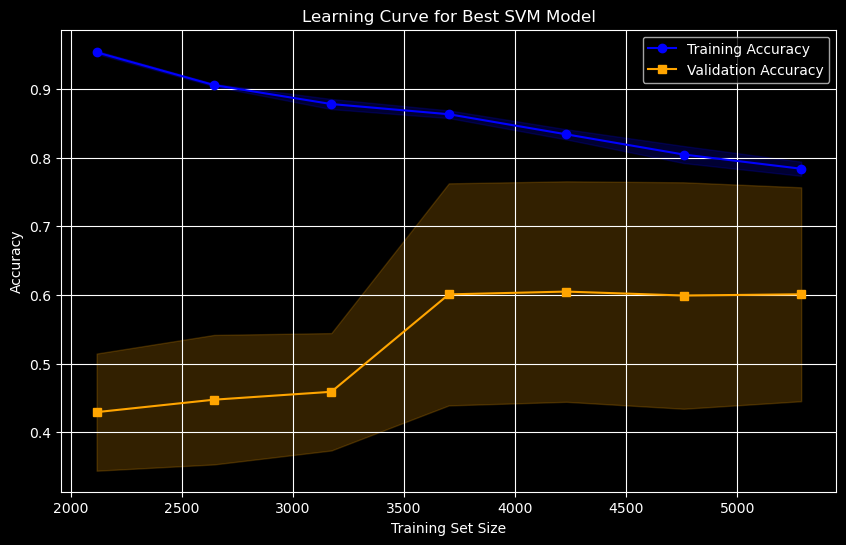

In [32]:
# Define the train sizes (fraction of training data to use)
train_sizes = np.linspace(0.1, 1.0, 10)

# Initialize the best SVM model with the hyperparameters from Optuna
svm_model = SVC(**best_svm_params)

# Compute learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    estimator=svm_model,
    X=X_train_pca_lbp_df,
    y=y_train_lbp_df,
    train_sizes=train_sizes,
    cv=5,  # 5-fold cross-validation
    scoring="accuracy",
    n_jobs=-1,  # Use all available CPU cores for faster computation
)

# Calculate the mean and standard deviation for training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Accuracy", color="blue", marker="o")
plt.fill_between(
    train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2
)

plt.plot(train_sizes, val_mean, label="Validation Accuracy", color="orange", marker="s")
plt.fill_between(
    train_sizes, val_mean - val_std, val_mean + val_std, color="orange", alpha=0.2
)

plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve for Best SVM Model")
plt.legend(loc="best")
plt.grid(True)
plt.show()

# Xgboost Trials

# **_Hsv Dataset_**

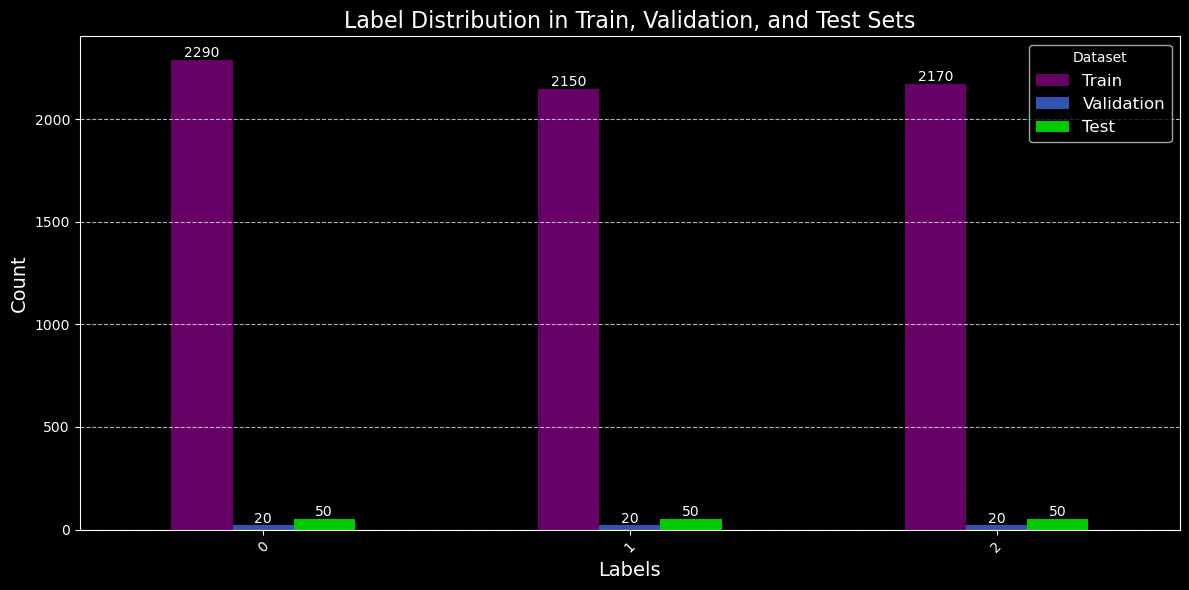

In [14]:
train_label_counts = Train_hsv_df['label'].value_counts()
val_label_counts = Validation_hsv_df['label'].value_counts()
test_label_counts = Test_hsv_df['label'].value_counts()

label_distribution = pd.DataFrame({
    'Train': train_label_counts,
    'Validation': val_label_counts,
    'Test': test_label_counts
})

colors = ['#800080', '#4169e1', '#00ff00']

ax = label_distribution.plot(kind='bar', figsize=(12, 6), alpha=0.8, color=colors)

for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',  # The text to display
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Coordinates of the annotation
        ha='center',  # Horizontal alignment
        va='center',  # Vertical alignment
        xytext=(0, 5),  # Offset the text slightly above the bar
        textcoords='offset points',  # Relative offset
        fontsize=10, color='white'
    )

# Add title and labels
plt.title('Label Distribution in Train, Validation, and Test Sets', fontsize=16)
plt.xlabel('Labels', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Dataset', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [13]:
X_train_hsv_df = Train_hsv_df.iloc[:, :-1]
X_val_hsv_df = Validation_hsv_df.iloc[:, :-1]
X_test_hsv_df = Test_hsv_df.iloc[:, :-1]

y_train_hsv_df = Train_hsv_df.iloc[:, -1]
y_val_hsv_df = Validation_hsv_df.iloc[:, -1]
y_test_hsv_df = Test_hsv_df.iloc[:, -1]

print(f"X_train shape: {X_train_hsv_df.shape}")
print(f"y_train shape: {y_train_hsv_df.shape}")
print(f"X_val shape: {X_val_hsv_df.shape}")
print(f"y_val shape: {y_val_hsv_df.shape}")
print(f"X_test shape: {X_test_hsv_df.shape}")
print(f"y_test shape: {y_test_hsv_df.shape}")


X_train shape: (6610, 768)
y_train shape: (6610,)
X_val shape: (60, 768)
y_val shape: (60,)
X_test shape: (150, 768)
y_test shape: (150,)


In [14]:
X_train_scaled_hsv_df, X_val_scaled_hsv_df, X_test_scaled_hsv_df = scale_features(X_train_hsv_df, X_val_hsv_df, X_test_hsv_df)
print(f"X_train_scaled shape: {X_train_scaled_hsv_df.shape}")
print(f"X_val_scaled shape: {X_val_scaled_hsv_df.shape}")
print(f"X_test_scaled shape: {X_test_scaled_hsv_df.shape}")

X_train_scaled shape: (6610, 768)
X_val_scaled shape: (60, 768)
X_test_scaled shape: (150, 768)


In [36]:
print(f"X_train_scaled head(2): {X_train_scaled_hsv_df.head(2)}")
print(f"X_val_scaled head(2): {X_val_scaled_hsv_df.head(2)}")
print(f"X_test_scaled head(2): {X_test_scaled_hsv_df.head(2)}")

X_train_scaled head(2):       Hue_0     Hue_1     Hue_2     Hue_3     Hue_4     Hue_5     Hue_6  \
0 -0.688915 -0.301624 -0.338493 -0.375763 -0.400387 -0.398240 -0.368719   
1 -0.492874 -0.294866 -0.325572 -0.367941 -0.334917 -0.287948 -0.164722   

      Hue_7     Hue_8     Hue_9  ...  Value_246  Value_247  Value_248  \
0 -0.396974 -0.343153 -0.343964  ...   0.802841   0.686458   0.680119   
1 -0.259796 -0.481413 -0.115008  ...   0.304028   0.143664   0.070811   

   Value_249  Value_250  Value_251  Value_252  Value_253  Value_254  Value_255  
0   0.648491   0.663601   0.594036   0.452068   0.278376   0.044968  -0.311652  
1   0.046372   0.047541  -0.033650  -0.219647  -0.360279  -0.501697  -0.638111  

[2 rows x 768 columns]
X_val_scaled head(2):       Hue_0     Hue_1     Hue_2     Hue_3     Hue_4     Hue_5     Hue_6  \
0 -0.646324 -0.178328  0.144277 -0.139034  0.158697 -0.080674  0.148423   
1 -0.607901 -0.301663 -0.342774 -0.397973 -0.401219 -0.398739 -0.391301   

      Hue_7    

Number of Components: 1, Cumulative Explained Variance Ratio: 0.1925, Approx. AIC: 44928.8530
Number of Components: 2, Cumulative Explained Variance Ratio: 0.3500, Approx. AIC: 44302.9539
Number of Components: 3, Cumulative Explained Variance Ratio: 0.4445, Approx. AIC: 43204.7536
Number of Components: 4, Cumulative Explained Variance Ratio: 0.5157, Approx. AIC: 42287.0004
Number of Components: 5, Cumulative Explained Variance Ratio: 0.5723, Approx. AIC: 41502.3664
Number of Components: 6, Cumulative Explained Variance Ratio: 0.6178, Approx. AIC: 40804.8112
Number of Components: 7, Cumulative Explained Variance Ratio: 0.6527, Approx. AIC: 40150.6187
Number of Components: 8, Cumulative Explained Variance Ratio: 0.6825, Approx. AIC: 39565.6225
Number of Components: 9, Cumulative Explained Variance Ratio: 0.7067, Approx. AIC: 39019.0560
Number of Components: 10, Cumulative Explained Variance Ratio: 0.7294, Approx. AIC: 38533.6441
Number of Components: 11, Cumulative Explained Variance Rat

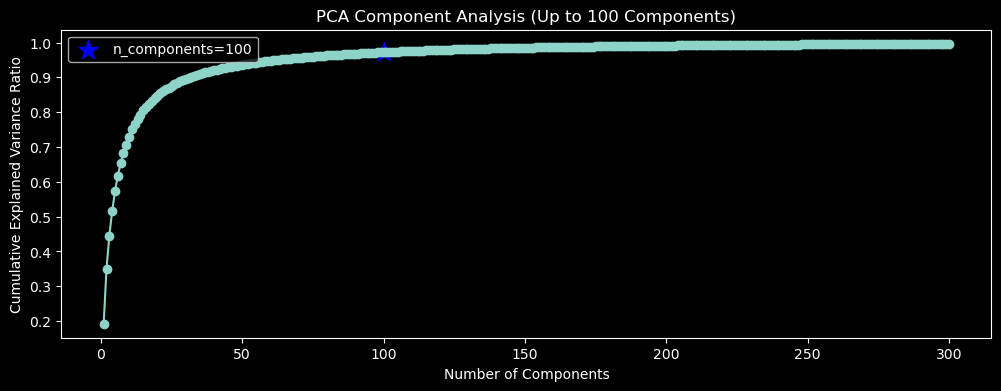

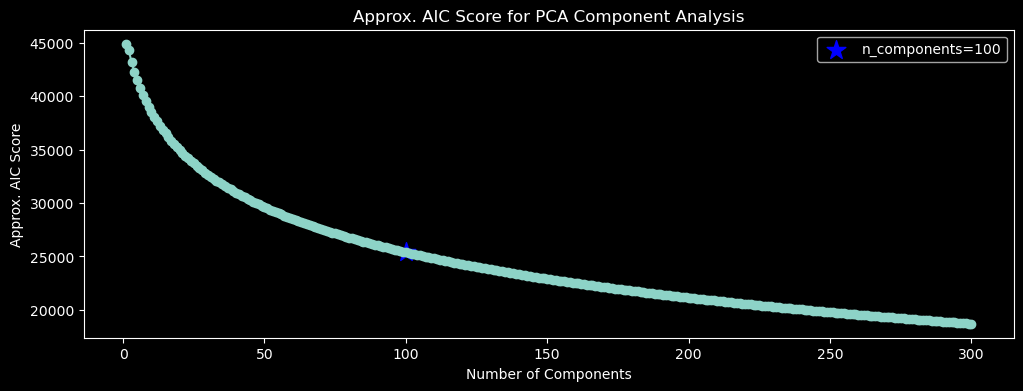

PCA transformed data converted to DataFrame.
Shape of X_train_pca_hsv_df: (6610, 100)
Shape of X_val_pca_hsv_df: (60, 100)
Shape of X_test_pca_hsv_df: (150, 100)


In [15]:
from sklearn.decomposition import PCA
n_components = np.arange(1, 301)  # Testing up to 12 components
explained_variance_ratios = []
aic_scores = []

for n in n_components:
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train_scaled_hsv_df)  # Fit PCA only on the training set
    
    cum_explained_variance = np.sum(pca.explained_variance_ratio_)
    explained_variance_ratios.append(cum_explained_variance)

    # Calculate approximate AIC score
    k = n
    log_likelihood = -0.5 * X_train_scaled_hsv_df.shape[0] * np.log(2 * np.pi * np.mean(pca.explained_variance_))
    aic = 2 * k - 2 * log_likelihood
    aic_scores.append(aic)

    print(f"Number of Components: {n}, Cumulative Explained Variance Ratio: {cum_explained_variance:.4f}, Approx. AIC: {aic:.4f}")

# Step 3: Plot explained variance
plt.figure(figsize=(12, 4))
plt.plot(n_components, explained_variance_ratios, marker='o')
plt.scatter(100, explained_variance_ratios[99], c='b', marker='*', label="n_components=100", s=200)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA Component Analysis (Up to 100 Components)')
plt.legend()
plt.show()

# Plot AIC scores
plt.figure(figsize=(12, 4))
plt.plot(n_components, aic_scores, marker='o')
plt.scatter(100, aic_scores[99], c='b', marker='*', label="n_components=100", s=200)
plt.xlabel('Number of Components')
plt.ylabel('Approx. AIC Score')
plt.title('Approx. AIC Score for PCA Component Analysis')
plt.legend()
plt.show()

optimal_n_components = 100  # Update this based on your analysis
pca = PCA(n_components=optimal_n_components)

# Apply PCA transformation only using the training fit
X_train_pca_hsv_df = pca.fit_transform(X_train_scaled_hsv_df)
X_val_pca_hsv_df = pca.transform(X_val_scaled_hsv_df)  # Apply transformation to validation
X_test_pca_hsv_df = pca.transform(X_test_scaled_hsv_df)  # Apply transformation to test

# Convert the NumPy arrays to DataFrame
X_train_pca_hsv_df = pd.DataFrame(X_train_pca_hsv_df)
X_val_pca_hsv_df = pd.DataFrame(X_val_pca_hsv_df)
X_test_pca_hsv_df = pd.DataFrame(X_test_pca_hsv_df)

# Now they are DataFrames and ready for use with pandas workflows
print("PCA transformed data converted to DataFrame.")
# Print the shapes
print("Shape of X_train_pca_hsv_df:", X_train_pca_hsv_df.shape)
print("Shape of X_val_pca_hsv_df:", X_val_pca_hsv_df.shape)
print("Shape of X_test_pca_hsv_df:", X_test_pca_hsv_df.shape)



# KNN Trials

[I 2024-12-13 16:04:42,261] A new study created in memory with name: no-name-c3a5a1ba-2c56-4a17-ac1e-2d268ff394ab


[I 2024-12-13 16:04:42,306] Trial 0 finished with value: 0.9 and parameters: {'n_neighbors': 13, 'weights': 'uniform', 'metric': 'euclidean'}. Best is trial 0 with value: 0.9.
[I 2024-12-13 16:04:42,349] Trial 1 finished with value: 0.9 and parameters: {'n_neighbors': 20, 'weights': 'uniform', 'metric': 'minkowski'}. Best is trial 0 with value: 0.9.
[I 2024-12-13 16:04:42,369] Trial 2 finished with value: 0.9 and parameters: {'n_neighbors': 18, 'weights': 'distance', 'metric': 'minkowski'}. Best is trial 0 with value: 0.9.
[I 2024-12-13 16:04:42,399] Trial 3 finished with value: 0.9 and parameters: {'n_neighbors': 13, 'weights': 'uniform', 'metric': 'minkowski'}. Best is trial 0 with value: 0.9.
[I 2024-12-13 16:04:42,427] Trial 4 finished with value: 0.9 and parameters: {'n_neighbors': 30, 'weights': 'uniform', 'metric': 'euclidean'}. Best is trial 0 with value: 0.9.
[I 2024-12-13 16:04:42,475] Trial 5 finished with value: 0.8833333333333333 and parameters: {'n_neighbors': 22, 'weight

Best parameters found for KNN: {'n_neighbors': 10, 'weights': 'uniform', 'metric': 'euclidean'}
Validation accuracy for KNN: 0.9333333333333333
Validation Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        20
           1       0.90      0.95      0.93        20
           2       0.95      0.90      0.92        20

    accuracy                           0.93        60
   macro avg       0.93      0.93      0.93        60
weighted avg       0.93      0.93      0.93        60

Test accuracy for KNN: 0.7666666666666667
Test Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.68      0.80      0.73        50
           1       0.71      0.74      0.73        50
           2       0.97      0.76      0.85        50

    accuracy                           0.77       150
   macro avg       0.79      0.77      0.77       150
weighted avg       0.79      

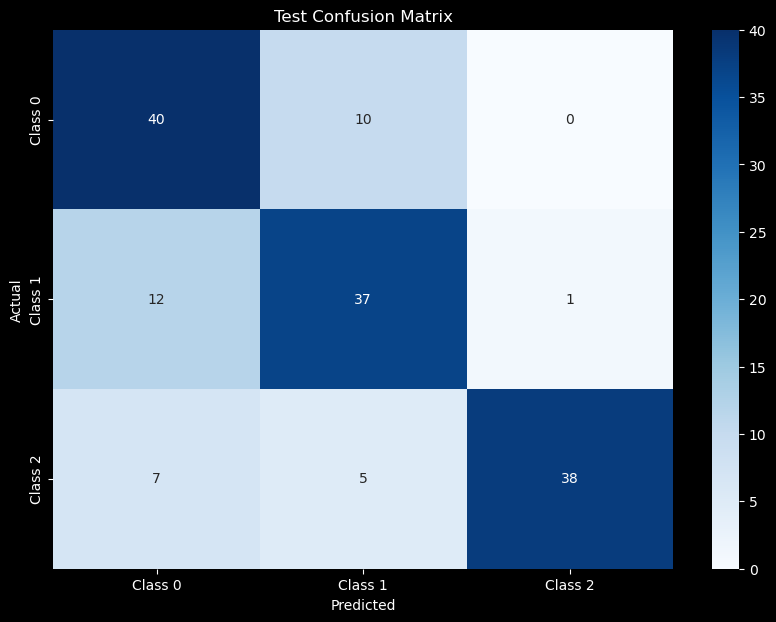

In [24]:
from sklearn.neighbors import KNeighborsClassifier


# Define the objective function for Optuna
def objective_knn(trial):
    # Define the hyperparameter space
    param = {
        'n_neighbors': trial.suggest_int('n_neighbors', 1, 50),
        'weights': trial.suggest_categorical('weights', ['uniform', 'distance']),
        'metric': trial.suggest_categorical('metric', ['euclidean', 'manhattan', 'minkowski']),
    }

    # Initialize the KNN model
    knn_model = KNeighborsClassifier(**param)

    # Train on the training set and validate on the validation set
    knn_model.fit(X_train_pca_hsv_df, y_train_hsv_df)
    y_val_pred = knn_model.predict(X_val_pca_hsv_df)
    val_accuracy = accuracy_score(y_val_hsv_df, y_val_pred)
    
    return val_accuracy

# Create a study object and optimize the objective function
study_knn = optuna.create_study(direction='maximize')
study_knn.optimize(objective_knn, n_trials=550)

# Get the best parameters from the study
best_knn_params = study_knn.best_params
print(f"Best parameters found for KNN: {best_knn_params}")

# Train the final KNN model using the best parameters on the full training set
best_knn_model = KNeighborsClassifier(**best_knn_params)
best_knn_model.fit(X_train_pca_hsv_df, y_train_hsv_df)

# Evaluate the final model on the validation set
y_val_pred_knn = best_knn_model.predict(X_val_pca_hsv_df)
val_accuracy_knn = accuracy_score(y_val_hsv_df, y_val_pred_knn)
print(f"Validation accuracy for KNN: {val_accuracy_knn}")
print("Validation Classification Report for KNN:")
print(classification_report(y_val_hsv_df, y_val_pred_knn))

# Evaluate the final model on the test set
y_test_pred_knn = best_knn_model.predict(X_test_pca_hsv_df)
test_accuracy_knn = accuracy_score(y_test_hsv_df, y_test_pred_knn)
print(f"Test accuracy for KNN: {test_accuracy_knn}")
print("Test Classification Report for KNN:")
print(classification_report(y_test_hsv_df, y_test_pred_knn))

cm = confusion_matrix(y_test_hsv_df, y_test_pred_knn)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1','Class 2'], yticklabels=['Class 0', 'Class 1','Class 2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Test Confusion Matrix')
plt.show()


KNeighborsClassifier(metric='euclidean', n_neighbors=10)


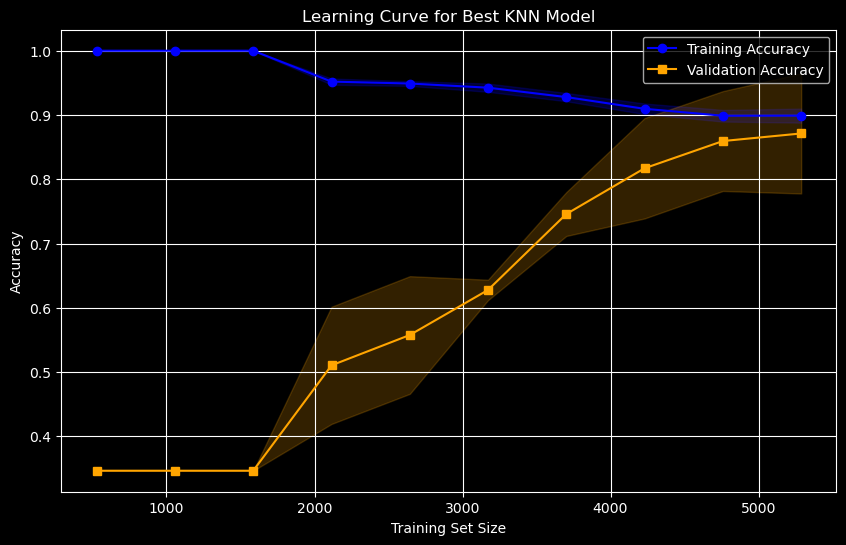

In [25]:
train_sizes = np.linspace(0.1, 1.0, 10)  # Fraction of training data to use

# Using the best KNN model from Optuna
knn_model = KNeighborsClassifier(**best_knn_params)
print(knn_model)
# Compute learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    estimator=knn_model,
    X=X_train_pca_hsv_df,
    y=y_train_hsv_df,
    train_sizes=train_sizes,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Calculate mean and standard deviation for training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Accuracy", color='blue', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)

plt.plot(train_sizes, val_mean, label="Validation Accuracy", color='orange', marker='s')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color='orange', alpha=0.2)

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve for Best KNN Model')
plt.legend(loc='best')
plt.grid(True)
plt.show()

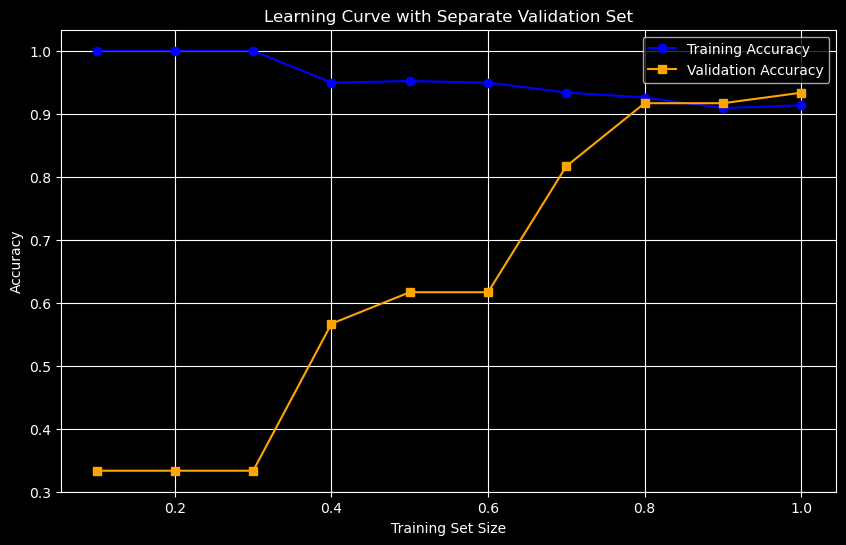

In [32]:
train_sizes = np.linspace(0.1, 1.0, 10)  # Fraction of training data to use
train_scores = []
val_scores = []

for train_size in train_sizes:
    # Determine subset of training data
    num_samples = int(len(X_train_pca_hsv_df) * train_size)
    X_train_subset = X_train_pca_hsv_df[:num_samples]
    y_train_subset = y_train_hsv_df[:num_samples]
    
    # Fit the model on this subset
    model = KNeighborsClassifier(**best_knn_params)
    model.fit(X_train_subset, y_train_subset)
    
    # Evaluate training accuracy on the subset
    train_accuracy = accuracy_score(y_train_subset, model.predict(X_train_subset))
    train_scores.append(train_accuracy)
    
    # Evaluate validation accuracy using your separate validation data
    val_accuracy = accuracy_score(y_val_hsv_df, model.predict(X_val_pca_hsv_df))
    val_scores.append(val_accuracy)

# Plotting learning curve manually
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores, label="Training Accuracy", color='blue', marker='o')
plt.plot(train_sizes, val_scores, label="Validation Accuracy", color='orange', marker='s')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve with Separate Validation Set')
plt.legend(loc='best')
plt.grid(True)
plt.show()


# Random Forest Trial

In [27]:
# Define the objective function for Optuna
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
    }

    # Initialize the Random Forest model
    rf_model = RandomForestClassifier(**param, random_state=42)

    # Train on the training set and validate on the validation set
    rf_model.fit(X_train_pca_hsv_df, y_train_hsv_df)
    y_val_pred = rf_model.predict(X_val_pca_hsv_df)
    val_accuracy = accuracy_score(y_val_hsv_df, y_val_pred)
    
    return val_accuracy

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Get the best parameters from the study
best_params_rf = study.best_params
print(f"Best parameters found: {best_params_rf}")



[I 2024-12-13 16:10:17,439] A new study created in memory with name: no-name-c8a72985-a5dc-4bd7-a9b6-5d3b96a827e1
[I 2024-12-13 16:10:42,753] Trial 0 finished with value: 0.95 and parameters: {'n_estimators': 292, 'max_depth': 15, 'min_samples_split': 10, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.95.
[I 2024-12-13 16:10:51,012] Trial 1 finished with value: 0.9333333333333333 and parameters: {'n_estimators': 118, 'max_depth': 15, 'min_samples_split': 14, 'min_samples_leaf': 12}. Best is trial 0 with value: 0.95.
[I 2024-12-13 16:11:29,042] Trial 2 finished with value: 0.9166666666666666 and parameters: {'n_estimators': 499, 'max_depth': 24, 'min_samples_split': 20, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.95.
[I 2024-12-13 16:11:42,334] Trial 3 finished with value: 0.9 and parameters: {'n_estimators': 205, 'max_depth': 26, 'min_samples_split': 2, 'min_samples_leaf': 15}. Best is trial 0 with value: 0.95.
[I 2024-12-13 16:12:06,341] Trial 4 finished with value: 0

Best parameters found: {'n_estimators': 292, 'max_depth': 15, 'min_samples_split': 10, 'min_samples_leaf': 7}


Validation Accuracy (RF): 0.95
Validation Classification Report (RF):
              precision    recall  f1-score   support

           0       0.90      0.95      0.93        20
           1       1.00      0.95      0.97        20
           2       0.95      0.95      0.95        20

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60

Test Accuracy (RF): 0.7933333333333333
Test Classification Report (RF):
              precision    recall  f1-score   support

           0       0.72      0.84      0.78        50
           1       0.74      0.84      0.79        50
           2       1.00      0.70      0.82        50

    accuracy                           0.79       150
   macro avg       0.82      0.79      0.80       150
weighted avg       0.82      0.79      0.80       150



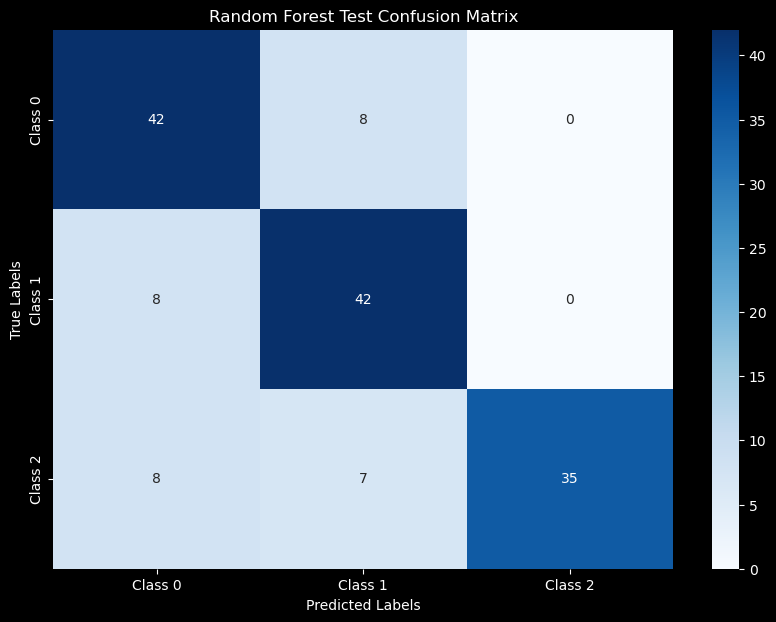

In [28]:
# Train the final model using the best parameters on the full training set
best_model_rf = RandomForestClassifier(**best_params_rf, random_state=42)
best_model_rf.fit(X_train_pca_hsv_df, y_train_hsv_df)

# Evaluate the final model on the validation set
y_val_pred_rf = best_model_rf.predict(X_val_pca_hsv_df)
val_accuracy_rf = accuracy_score(y_val_hsv_df, y_val_pred_rf)
print(f"Validation Accuracy (RF): {val_accuracy_rf}")
print("Validation Classification Report (RF):")
print(classification_report(y_val_hsv_df, y_val_pred_rf))

# Evaluate the final model on the test set
y_test_pred_rf = best_model_rf.predict(X_test_pca_hsv_df)
test_accuracy_rf = accuracy_score(y_test_hsv_df, y_test_pred_rf)
print(f"Test Accuracy (RF): {test_accuracy_rf}")
print("Test Classification Report (RF):")
print(classification_report(y_test_hsv_df, y_test_pred_rf))

# Confusion Matrix for the test set
cm_rf = confusion_matrix(y_test_hsv_df, y_test_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1', 'Class 2'], 
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Random Forest Test Confusion Matrix')
plt.show()

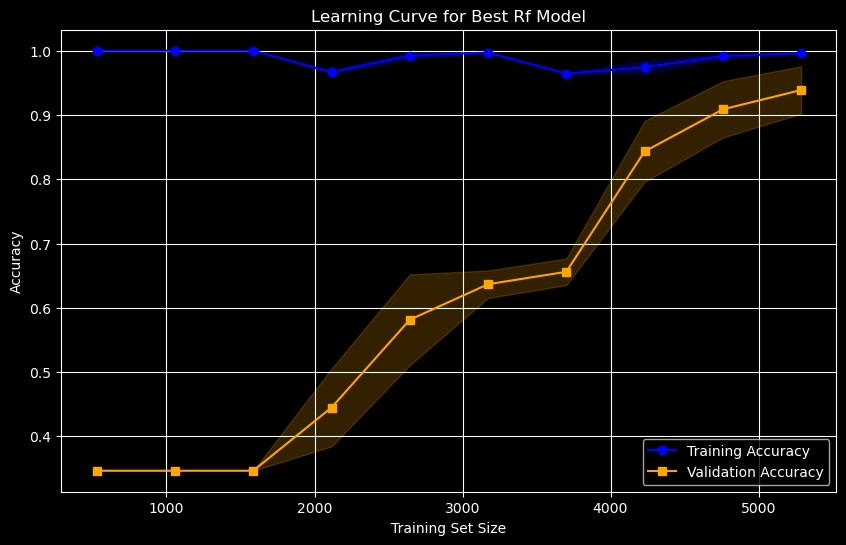

In [29]:
train_sizes = np.linspace(0.1, 1.0, 10)  # Fraction of training data to use



# Compute learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    estimator=best_model_rf,
    X=X_train_pca_hsv_df,
    y=y_train_hsv_df,
    train_sizes=train_sizes,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Calculate mean and standard deviation for training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Accuracy", color='blue', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)

plt.plot(train_sizes, val_mean, label="Validation Accuracy", color='orange', marker='s')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color='orange', alpha=0.2)

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve for Best Rf Model')
plt.legend(loc='best')
plt.grid(True)
plt.show()

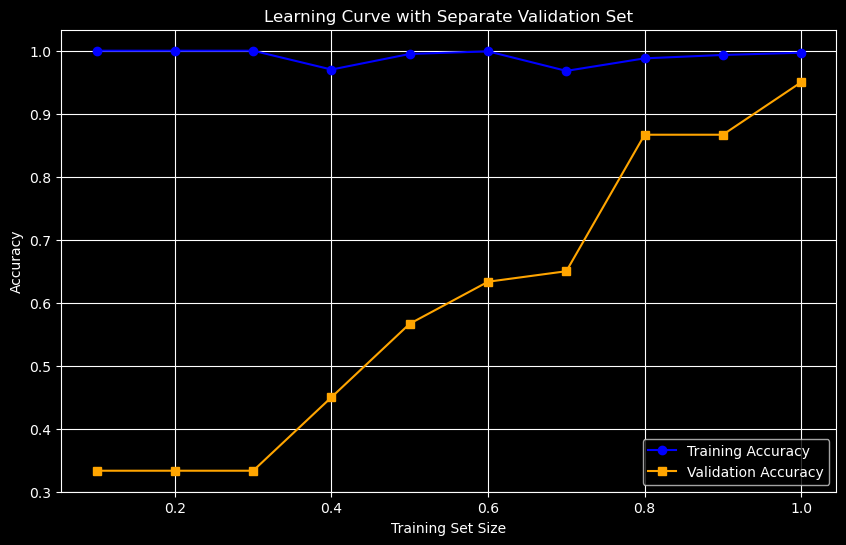

In [30]:
train_sizes = np.linspace(0.1, 1.0, 10)  # Fraction of training data to use
train_scores = []
val_scores = []

for train_size in train_sizes:
    # Determine subset of training data
    num_samples = int(len(X_train_pca_hsv_df) * train_size)
    X_train_subset = X_train_pca_hsv_df[:num_samples]
    y_train_subset = y_train_hsv_df[:num_samples]
    
    # Fit the model on this subset
    model = RandomForestClassifier(**best_params_rf, random_state=42)
    model.fit(X_train_subset, y_train_subset)
    
    # Evaluate training accuracy on the subset
    train_accuracy = accuracy_score(y_train_subset, model.predict(X_train_subset))
    train_scores.append(train_accuracy)
    
    # Evaluate validation accuracy using your separate validation data
    val_accuracy = accuracy_score(y_val_hsv_df, model.predict(X_val_pca_hsv_df))
    val_scores.append(val_accuracy)

# Plotting learning curve manually
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores, label="Training Accuracy", color='blue', marker='o')
plt.plot(train_sizes, val_scores, label="Validation Accuracy", color='orange', marker='s')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve with Separate Validation Set')
plt.legend(loc='best')
plt.grid(True)
plt.show()


# XGboost Trials

# Decision Tree Trials

[I 2024-12-22 18:25:59,624] A new study created in memory with name: no-name-4570d02d-150a-4ec0-8e31-456a7266cbd9
[I 2024-12-22 18:26:00,645] Trial 0 finished with value: 0.7833333333333333 and parameters: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 5, 'max_features': None}. Best is trial 0 with value: 0.7833333333333333.
[I 2024-12-22 18:26:00,693] Trial 1 finished with value: 0.5833333333333334 and parameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 0 with value: 0.7833333333333333.
[I 2024-12-22 18:26:01,084] Trial 2 finished with value: 0.7666666666666667 and parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': None}. Best is trial 0 with value: 0.7833333333333333.
[I 2024-12-22 18:26:01,160] Trial 3 finished with value: 0.6666666666666666 and parameters: {'criterion': 'gini', 'max_depth': 8, 'min

Best parameters found for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': None}
Validation accuracy for Decision Tree: 0.7666666666666667
Validation Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82        20
           1       0.68      0.75      0.71        20
           2       0.79      0.75      0.77        20

    accuracy                           0.77        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.77      0.77      0.77        60

Test accuracy for Decision Tree: 0.7066666666666667
Test Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.68      0.68      0.68        50
           1       0.68      0.68      0.68        50
           2       0.76      0.76      0.76        50

    accuracy                           0.

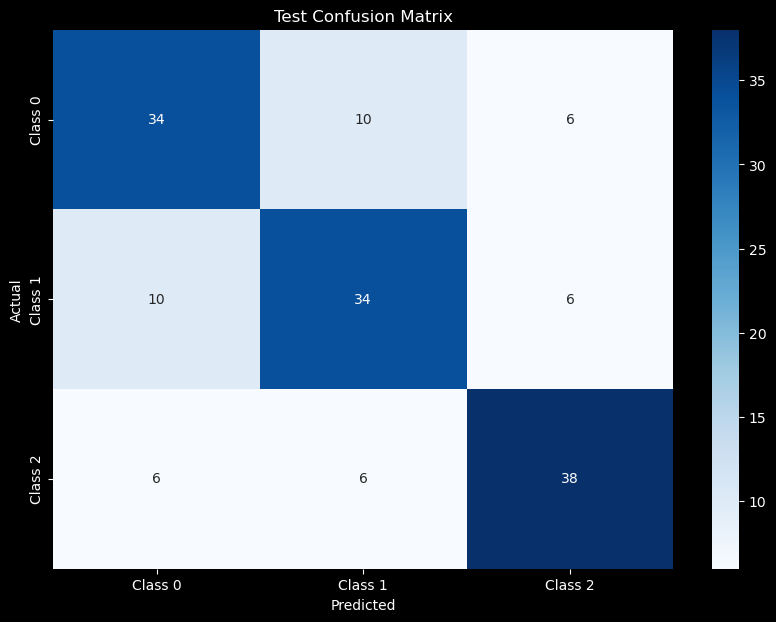

In [23]:
from sklearn.tree import DecisionTreeClassifier
import optuna
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Define the objective function for Optuna
def objective_dt(trial):
    # Define the hyperparameter space
    param = {
        "criterion": trial.suggest_categorical(
            "criterion", ["gini", "entropy"]
        ),  # Splitting criterion
        "max_depth": trial.suggest_int("max_depth", 1, 20),  # Maximum depth of the tree
        "min_samples_split": trial.suggest_int(
            "min_samples_split", 2, 10
        ),  # Minimum samples required to split a node
        "min_samples_leaf": trial.suggest_int(
            "min_samples_leaf", 1, 10
        ),  # Minimum samples required at a leaf node
        "max_features": trial.suggest_categorical(
            "max_features", ["sqrt", "log2", None]
        ),  # Number of features to consider for a split
    }

    # Initialize the Decision Tree model
    dt_model = DecisionTreeClassifier(**param)

    # Train on the training set and validate on the validation set
    dt_model.fit(X_train_pca_hsv_df, y_train_hsv_df)
    y_val_pred = dt_model.predict(X_val_pca_hsv_df)
    val_accuracy = accuracy_score(y_val_hsv_df, y_val_pred)

    return val_accuracy


# Create a study object and optimize the objective function
study_dt = optuna.create_study(direction="maximize")
study_dt.optimize(objective_dt, n_trials=350)

# Get the best parameters from the study
best_dt_params = study_dt.best_params
print(f"Best parameters found for Decision Tree: {best_dt_params}")

# Train the final Decision Tree model using the best parameters on the full training set
best_dt_model = DecisionTreeClassifier(**best_dt_params)
best_dt_model.fit(X_train_pca_hsv_df, y_train_hsv_df)

# Evaluate the final model on the validation set
y_val_pred_dt = best_dt_model.predict(X_val_pca_hsv_df)
val_accuracy_dt = accuracy_score(y_val_hsv_df, y_val_pred_dt)
print(f"Validation accuracy for Decision Tree: {val_accuracy_dt}")
print("Validation Classification Report for Decision Tree:")
print(classification_report(y_val_hsv_df, y_val_pred_dt))

# Evaluate the final model on the test set
y_test_pred_dt = best_dt_model.predict(X_test_pca_hsv_df)
test_accuracy_dt = accuracy_score(y_test_hsv_df, y_test_pred_dt)
print(f"Test accuracy for Decision Tree: {test_accuracy_dt}")
print("Test Classification Report for Decision Tree:")
print(classification_report(y_test_hsv_df, y_test_pred_dt))

# Confusion Matrix
cm = confusion_matrix(y_test_hsv_df, y_test_pred_dt)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Class 0", "Class 1", "Class 2"],
    yticklabels=["Class 0", "Class 1", "Class 2"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Test Confusion Matrix")
plt.show()

# Learning Rate

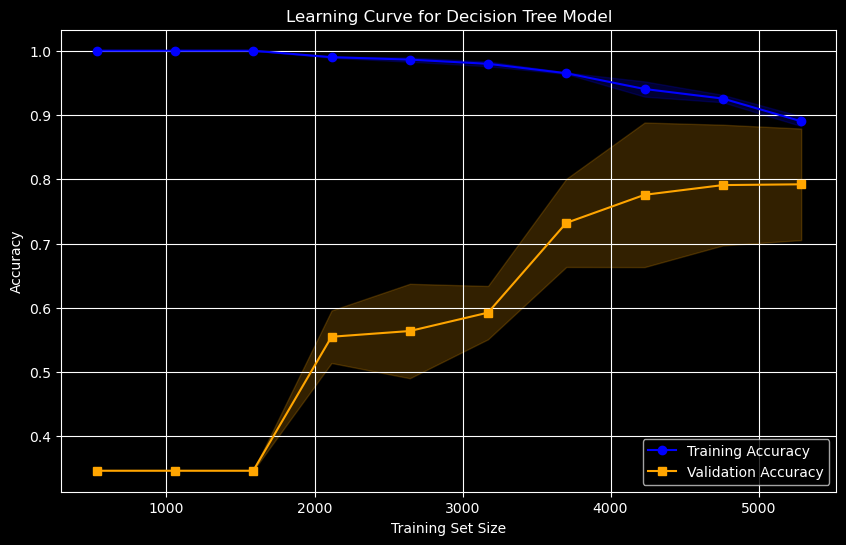

In [25]:
# Define the training sizes
train_sizes = np.linspace(0.1, 1.0, 10)  # Fraction of training data to use

# Initialize the Decision Tree model (use best parameters if available)
dt_model = DecisionTreeClassifier(**best_dt_params, random_state=42)

# Compute learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    estimator=dt_model,
    X=X_train_pca_hsv_df,
    y=y_train_hsv_df,
    train_sizes=train_sizes,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
)

# Calculate mean and standard deviation for training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Accuracy", color="blue", marker="o")
plt.fill_between(
    train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2
)

plt.plot(train_sizes, val_mean, label="Validation Accuracy", color="orange", marker="s")
plt.fill_between(
    train_sizes, val_mean - val_std, val_mean + val_std, color="orange", alpha=0.2
)

plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve for Decision Tree Model")
plt.legend(loc="best")
plt.grid(True)
plt.show()

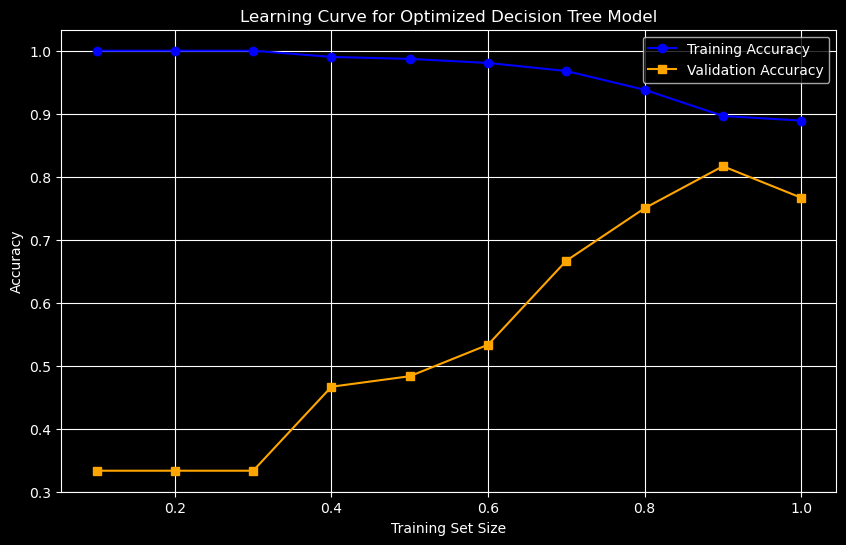

In [27]:
# Define the training sizes
train_sizes = np.linspace(0.1, 1.0, 10)  # Fraction of training data to use
train_scores = []
val_scores = []

# Loop through each training size
for train_size in train_sizes:
    # Determine subset of training data
    num_samples = int(len(X_train_pca_hsv_df) * train_size)
    X_train_subset = X_train_pca_hsv_df[:num_samples]
    y_train_subset = y_train_hsv_df[:num_samples]

    # Fit the model on this subset
    dt_model = DecisionTreeClassifier(**best_dt_params, random_state=42)
    dt_model.fit(X_train_subset, y_train_subset)

    # Evaluate training accuracy on the subset
    train_accuracy = accuracy_score(y_train_subset, dt_model.predict(X_train_subset))
    train_scores.append(train_accuracy)

    # Evaluate validation accuracy using your separate validation data
    val_accuracy = accuracy_score(y_val_hsv_df, dt_model.predict(X_val_pca_hsv_df))
    val_scores.append(val_accuracy)

# Plotting learning curve manually
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores, label="Training Accuracy", color="blue", marker="o")
plt.plot(
    train_sizes, val_scores, label="Validation Accuracy", color="orange", marker="s"
)

plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve for Optimized Decision Tree Model")
plt.legend(loc="best")
plt.grid(True)
plt.show()

# **_RGB Dataset_**

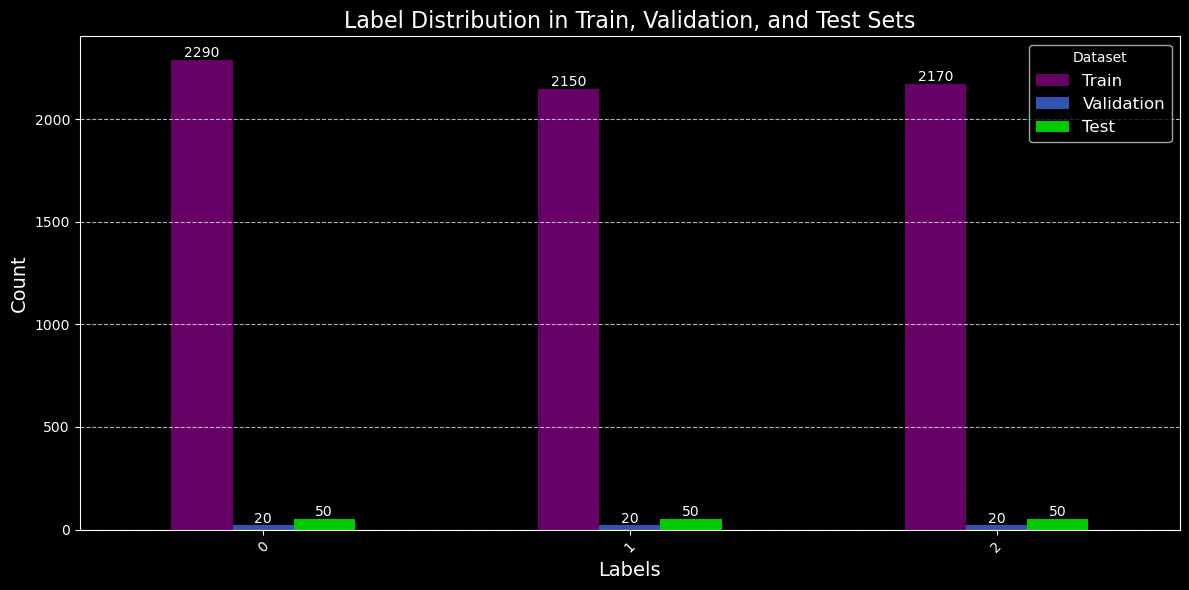

In [28]:
# Compute label counts for train, validation, and test datasets
train_label_counts = Train_rgb_df['label'].value_counts()
val_label_counts = Validation_rgb_df['label'].value_counts()
test_label_counts = Test_rgb_df['label'].value_counts()

# Combine counts into a DataFrame
label_distribution = pd.DataFrame({
    'Train': train_label_counts,
    'Validation': val_label_counts,
    'Test': test_label_counts
})

# Define colors (replaced HSV with equivalent RGB hex values)
colors = ['#800080', '#4169e1', '#00ff00']  # Purple, Royal Blue, and Green

# Plotting the bar chart
ax = label_distribution.plot(kind='bar', figsize=(12, 6), alpha=0.8, color=colors)

# Annotate bars
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',  # The text to display
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Coordinates of the annotation
        ha='center',  # Horizontal alignment
        va='center',  # Vertical alignment
        xytext=(0, 5),  # Offset the text slightly above the bar
        textcoords='offset points',  # Relative offset
        fontsize=10, color='white'
    )

# Add title and labels
plt.title('Label Distribution in Train, Validation, and Test Sets', fontsize=16)
plt.xlabel('Labels', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Dataset', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [29]:
# Split the data into features and target for train, validation, and test datasets
X_train_rgb_df = Train_rgb_df.iloc[:, :-1]
X_val_rgb_df = Validation_rgb_df.iloc[:, :-1]
X_test_rgb_df = Test_rgb_df.iloc[:, :-1]

y_train_rgb_df = Train_rgb_df.iloc[:, -1]
y_val_rgb_df = Validation_rgb_df.iloc[:, -1]
y_test_rgb_df = Test_rgb_df.iloc[:, -1]

# Print the shapes of the datasets
print(f"X_train shape: {X_train_rgb_df.shape}")
print(f"y_train shape: {y_train_rgb_df.shape}")
print(f"X_val shape: {X_val_rgb_df.shape}")
print(f"y_val shape: {y_val_rgb_df.shape}")
print(f"X_test shape: {X_test_rgb_df.shape}")
print(f"y_test shape: {y_test_rgb_df.shape}")


X_train shape: (6610, 768)
y_train shape: (6610,)
X_val shape: (60, 768)
y_val shape: (60,)
X_test shape: (150, 768)
y_test shape: (150,)


In [30]:
# Scale features for train, validation, and test datasets
X_train_scaled_rgb_df, X_val_scaled_rgb_df, X_test_scaled_rgb_df = scale_features(X_train_rgb_df, X_val_rgb_df, X_test_rgb_df)

# Print the shapes of the scaled datasets
print(f"X_train_scaled shape: {X_train_scaled_rgb_df.shape}")
print(f"X_val_scaled shape: {X_val_scaled_rgb_df.shape}")
print(f"X_test_scaled shape: {X_test_scaled_rgb_df.shape}")


X_train_scaled shape: (6610, 768)
X_val_scaled shape: (60, 768)
X_test_scaled shape: (150, 768)


In [31]:
print(f"X_train_scaled head(2): {X_train_scaled_rgb_df.head(2)}")
print(f"X_val_scaled head(2): {X_val_scaled_rgb_df.head(2)}")
print(f"X_test_scaled head(2): {X_test_scaled_rgb_df.head(2)}")

X_train_scaled head(2):       Red_0     Red_1     Red_2     Red_3     Red_4     Red_5     Red_6  \
0 -0.479149 -0.012553 -0.044434 -0.105754 -0.126285 -0.125124 -0.117601   
1 -0.276558  0.784213  1.339476  1.008129  0.931937  0.958688  0.912937   

      Red_7     Red_8     Red_9  ...  Blue_246  Blue_247  Blue_248  Blue_249  \
0 -0.113241 -0.103175 -0.094713  ... -0.510360 -0.331846 -0.482070 -0.397014   
1  0.907383  1.482518  1.272336  ... -0.514012 -0.520785 -0.514909 -0.497891   

   Blue_250  Blue_251  Blue_252  Blue_253  Blue_254  Blue_255  
0 -0.520852 -0.509888 -0.363411 -0.533956 -0.267112 -0.502065  
1 -0.529172 -0.574833 -0.478524 -0.538250 -0.318228 -0.545773  

[2 rows x 768 columns]
X_val_scaled head(2):       Red_0     Red_1     Red_2     Red_3     Red_4     Red_5     Red_6  \
0 -0.507218 -0.333839 -0.323326 -0.358162 -0.339134 -0.322918 -0.307654   
1 -0.507191 -0.335173 -0.329765 -0.367948 -0.354222 -0.346923 -0.344990   

      Red_7     Red_8     Red_9  ...  Blue_24

Number of Components: 1, Cumulative Explained Variance Ratio: 0.2571, Approx. AIC: 47087.3744
Number of Components: 2, Cumulative Explained Variance Ratio: 0.4483, Approx. AIC: 46183.5686
Number of Components: 3, Cumulative Explained Variance Ratio: 0.6097, Approx. AIC: 45538.0661
Number of Components: 4, Cumulative Explained Variance Ratio: 0.6900, Approx. AIC: 44457.0262
Number of Components: 5, Cumulative Explained Variance Ratio: 0.7497, Approx. AIC: 43532.3482
Number of Components: 6, Cumulative Explained Variance Ratio: 0.7926, Approx. AIC: 42696.7583
Number of Components: 7, Cumulative Explained Variance Ratio: 0.8188, Approx. AIC: 41894.9564
Number of Components: 8, Cumulative Explained Variance Ratio: 0.8407, Approx. AIC: 41188.3715
Number of Components: 9, Cumulative Explained Variance Ratio: 0.8610, Approx. AIC: 40569.6303
Number of Components: 10, Cumulative Explained Variance Ratio: 0.8771, Approx. AIC: 39997.6709
Number of Components: 11, Cumulative Explained Variance Rat

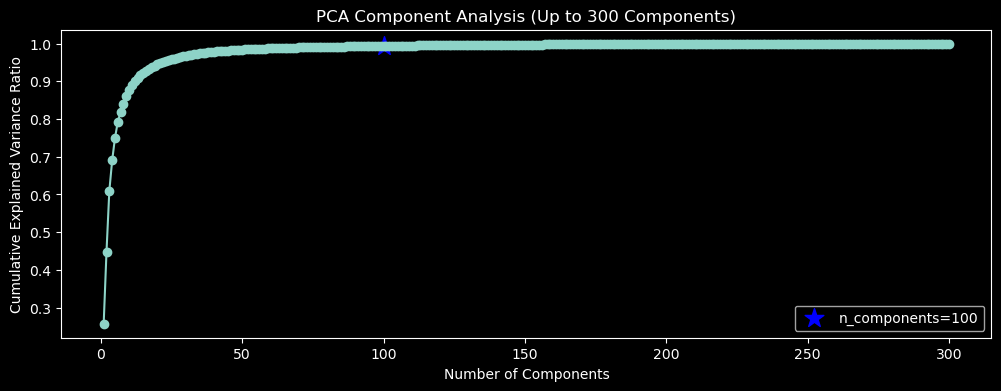

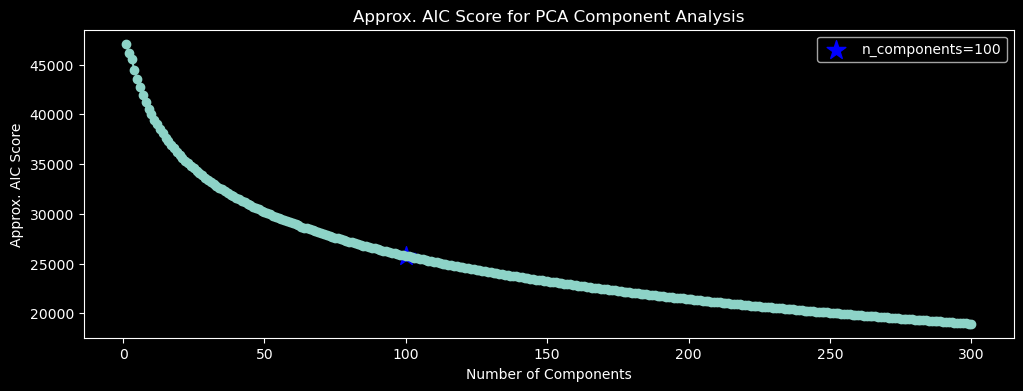

PCA transformed data converted to DataFrame.
Shape of X_train_pca_rgb_df: (6610, 100)
Shape of X_val_pca_rgb_df: (60, 100)
Shape of X_test_pca_rgb_df: (150, 100)


In [32]:
from sklearn.decomposition import PCA
n_components = np.arange(1, 301)  # Testing up to 300 components
explained_variance_ratios = []
aic_scores = []

for n in n_components:
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train_scaled_rgb_df)  # Fit PCA only on the training set
    
    cum_explained_variance = np.sum(pca.explained_variance_ratio_)
    explained_variance_ratios.append(cum_explained_variance)

    # Calculate approximate AIC score
    k = n
    log_likelihood = -0.5 * X_train_scaled_rgb_df.shape[0] * np.log(2 * np.pi * np.mean(pca.explained_variance_))
    aic = 2 * k - 2 * log_likelihood
    aic_scores.append(aic)

    print(f"Number of Components: {n}, Cumulative Explained Variance Ratio: {cum_explained_variance:.4f}, Approx. AIC: {aic:.4f}")

# Step 3: Plot explained variance
plt.figure(figsize=(12, 4))
plt.plot(n_components, explained_variance_ratios, marker='o')
plt.scatter(100, explained_variance_ratios[99], c='b', marker='*', label="n_components=100", s=200)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA Component Analysis (Up to 300 Components)')
plt.legend()
plt.show()

# Plot AIC scores
plt.figure(figsize=(12, 4))
plt.plot(n_components, aic_scores, marker='o')
plt.scatter(100, aic_scores[99], c='b', marker='*', label="n_components=100", s=200)
plt.xlabel('Number of Components')
plt.ylabel('Approx. AIC Score')
plt.title('Approx. AIC Score for PCA Component Analysis')
plt.legend()
plt.show()

optimal_n_components = 100  # Update this based on your analysis
pca = PCA(n_components=optimal_n_components)

# Apply PCA transformation only using the training fit
X_train_pca_rgb_df = pca.fit_transform(X_train_scaled_rgb_df)
X_val_pca_rgb_df = pca.transform(X_val_scaled_rgb_df)  # Apply transformation to validation
X_test_pca_rgb_df = pca.transform(X_test_scaled_rgb_df)  # Apply transformation to test

# Convert the NumPy arrays to DataFrame
X_train_pca_rgb_df = pd.DataFrame(X_train_pca_rgb_df)
X_val_pca_rgb_df = pd.DataFrame(X_val_pca_rgb_df)
X_test_pca_rgb_df = pd.DataFrame(X_test_pca_rgb_df)

# Now they are DataFrames and ready for use with pandas workflows
print("PCA transformed data converted to DataFrame.")
# Print the shapes
print("Shape of X_train_pca_rgb_df:", X_train_pca_rgb_df.shape)
print("Shape of X_val_pca_rgb_df:", X_val_pca_rgb_df.shape)
print("Shape of X_test_pca_rgb_df:", X_test_pca_rgb_df.shape)


# KNN

[I 2024-12-13 22:58:18,480] A new study created in memory with name: no-name-4c609d3f-fc2f-44da-9f61-59e9e0839377
[I 2024-12-13 22:58:19,211] Trial 0 finished with value: 0.8333333333333334 and parameters: {'n_neighbors': 25, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 0 with value: 0.8333333333333334.
[I 2024-12-13 22:58:19,271] Trial 1 finished with value: 0.8666666666666667 and parameters: {'n_neighbors': 41, 'weights': 'uniform', 'metric': 'euclidean'}. Best is trial 1 with value: 0.8666666666666667.
[I 2024-12-13 22:58:19,361] Trial 2 finished with value: 0.8166666666666667 and parameters: {'n_neighbors': 8, 'weights': 'uniform', 'metric': 'manhattan'}. Best is trial 1 with value: 0.8666666666666667.
[I 2024-12-13 22:58:19,404] Trial 3 finished with value: 0.85 and parameters: {'n_neighbors': 12, 'weights': 'uniform', 'metric': 'minkowski'}. Best is trial 1 with value: 0.8666666666666667.
[I 2024-12-13 22:58:19,471] Trial 4 finished with value: 0.8166666666666667 

Best parameters found for KNN: {'n_neighbors': 49, 'weights': 'distance', 'metric': 'euclidean'}
Validation accuracy for KNN: 0.8833333333333333
Validation Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        20
           1       0.87      1.00      0.93        20
           2       0.94      0.75      0.83        20

    accuracy                           0.88        60
   macro avg       0.89      0.88      0.88        60
weighted avg       0.89      0.88      0.88        60

Test accuracy for KNN: 0.76
Test Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.73      0.76      0.75        50
           1       0.67      0.84      0.74        50
           2       0.97      0.68      0.80        50

    accuracy                           0.76       150
   macro avg       0.79      0.76      0.76       150
weighted avg       0.79      0.76      0.7

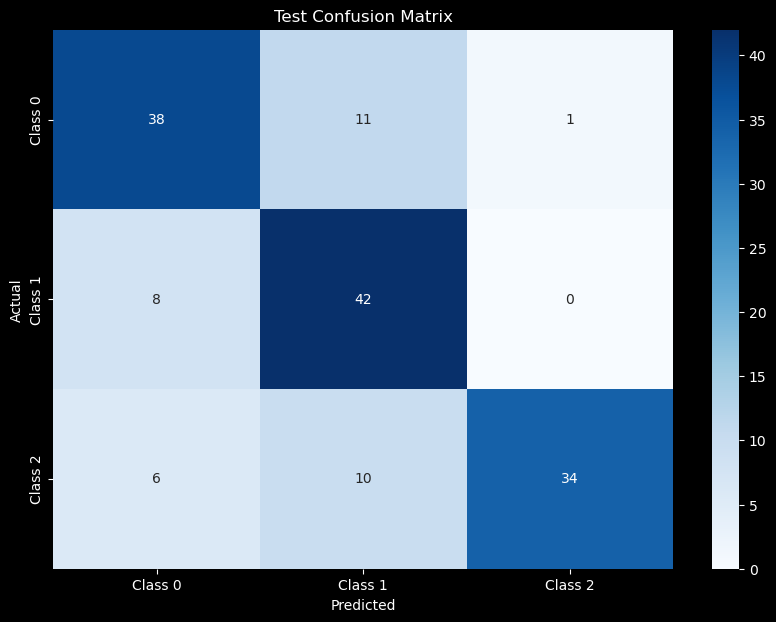

In [18]:
from sklearn.neighbors import KNeighborsClassifier
def objective_knn(trial):
    # Define the hyperparameter space
    param = {
        'n_neighbors': trial.suggest_int('n_neighbors', 1, 50),
        'weights': trial.suggest_categorical('weights', ['uniform', 'distance']),
        'metric': trial.suggest_categorical('metric', ['euclidean', 'manhattan', 'minkowski']),
    }

    # Initialize the KNN model
    knn_model = KNeighborsClassifier(**param)

    # Train on the training set and validate on the validation set
    knn_model.fit(X_train_pca_rgb_df, y_train_rgb_df)
    y_val_pred = knn_model.predict(X_val_pca_rgb_df)
    val_accuracy = accuracy_score(y_val_rgb_df, y_val_pred)
    
    return val_accuracy


# Create a study object and optimize the objective function
study_knn = optuna.create_study(direction='maximize')
study_knn.optimize(objective_knn, n_trials=550)

# Get the best parameters from the study
best_knn_params = study_knn.best_params
print(f"Best parameters found for KNN: {best_knn_params}")

# Train the final KNN model using the best parameters on the full training set
best_knn_model = KNeighborsClassifier(**best_knn_params)
best_knn_model.fit(X_train_pca_rgb_df, y_train_rgb_df)

# Evaluate the final model on the validation set
y_val_pred_knn = best_knn_model.predict(X_val_pca_rgb_df)
val_accuracy_knn = accuracy_score(y_val_rgb_df, y_val_pred_knn)
print(f"Validation accuracy for KNN: {val_accuracy_knn}")
print("Validation Classification Report for KNN:")
print(classification_report(y_val_rgb_df, y_val_pred_knn))

# Evaluate the final model on the test set
y_test_pred_knn = best_knn_model.predict(X_test_pca_rgb_df)
test_accuracy_knn = accuracy_score(y_test_rgb_df, y_test_pred_knn)
print(f"Test accuracy for KNN: {test_accuracy_knn}")
print("Test Classification Report for KNN:")
print(classification_report(y_test_rgb_df, y_test_pred_knn))

cm = confusion_matrix(y_test_rgb_df, y_test_pred_knn)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Test Confusion Matrix')
plt.show()

KNeighborsClassifier(metric='euclidean', n_neighbors=49, weights='distance')


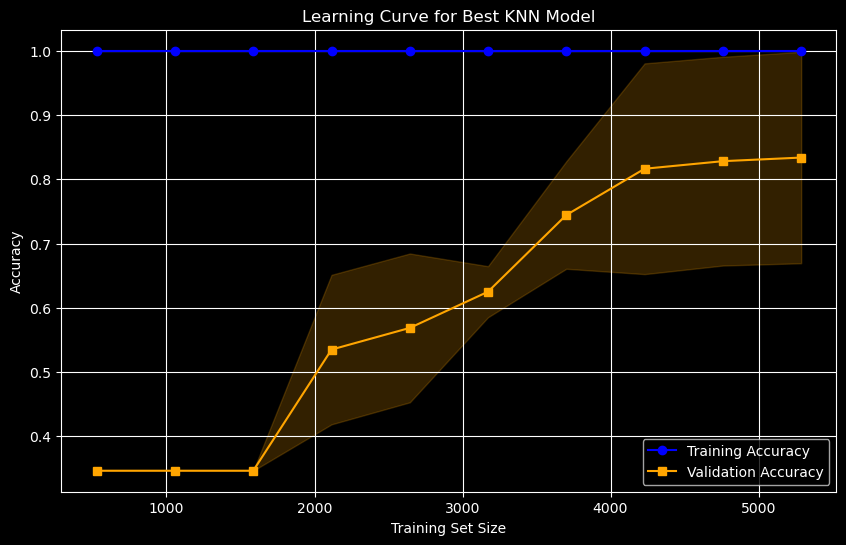

In [19]:
train_sizes = np.linspace(0.1, 1.0, 10)  # Fraction of training data to use

# Using the best KNN model from Optuna
knn_model = KNeighborsClassifier(**best_knn_params)
print(knn_model)
# Compute learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    estimator=knn_model,
    X=X_train_pca_rgb_df,
    y=y_train_rgb_df,
    train_sizes=train_sizes,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Calculate mean and standard deviation for training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Accuracy", color='blue', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)

plt.plot(train_sizes, val_mean, label="Validation Accuracy", color='orange', marker='s')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color='orange', alpha=0.2)

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve for Best KNN Model')
plt.legend(loc='best')
plt.grid(True)
plt.show()

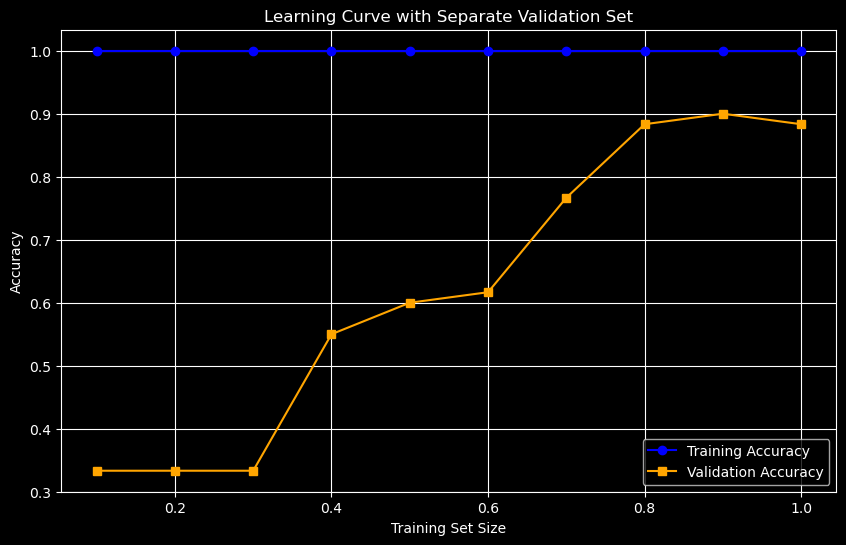

In [20]:
train_sizes = np.linspace(0.1, 1.0, 10)  # Fraction of training data to use
train_scores = []
val_scores = []

for train_size in train_sizes:
    # Determine subset of training data
    num_samples = int(len(X_train_pca_rgb_df) * train_size)
    X_train_subset = X_train_pca_rgb_df[:num_samples]
    y_train_subset = y_train_rgb_df[:num_samples]
    
    # Fit the model on this subset
    model = KNeighborsClassifier(**best_knn_params)
    model.fit(X_train_subset, y_train_subset)
    
    # Evaluate training accuracy on the subset
    train_accuracy = accuracy_score(y_train_subset, model.predict(X_train_subset))
    train_scores.append(train_accuracy)
    
    # Evaluate validation accuracy using your separate validation data
    val_accuracy = accuracy_score(y_val_rgb_df, model.predict(X_val_pca_rgb_df))
    val_scores.append(val_accuracy)

# Plotting learning curve manually
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores, label="Training Accuracy", color='blue', marker='o')
plt.plot(train_sizes, val_scores, label="Validation Accuracy", color='orange', marker='s')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve with Separate Validation Set')
plt.legend(loc='best')
plt.grid(True)
plt.show()


# Random Forest

In [21]:
# Define the objective function for Optuna
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
    }

    # Initialize the Random Forest model
    rf_model = RandomForestClassifier(**param, random_state=42)

    # Train on the training set and validate on the validation set
    rf_model.fit(X_train_pca_rgb_df, y_train_rgb_df)
    y_val_pred = rf_model.predict(X_val_pca_rgb_df)
    val_accuracy = accuracy_score(y_val_rgb_df, y_val_pred)
    
    return val_accuracy

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Get the best parameters from the study
best_params_rf = study.best_params
print(f"Best parameters found: {best_params_rf}")


[I 2024-12-13 23:03:04,603] A new study created in memory with name: no-name-c042c482-6bf6-42df-8f36-feda3ad4fca8
[I 2024-12-13 23:03:34,498] Trial 0 finished with value: 0.8 and parameters: {'n_estimators': 425, 'max_depth': 26, 'min_samples_split': 17, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.8.
[I 2024-12-13 23:04:10,049] Trial 1 finished with value: 0.7833333333333333 and parameters: {'n_estimators': 408, 'max_depth': 22, 'min_samples_split': 6, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.8.
[I 2024-12-13 23:04:44,304] Trial 2 finished with value: 0.7833333333333333 and parameters: {'n_estimators': 467, 'max_depth': 28, 'min_samples_split': 10, 'min_samples_leaf': 15}. Best is trial 0 with value: 0.8.
[I 2024-12-13 23:04:50,763] Trial 3 finished with value: 0.7833333333333333 and parameters: {'n_estimators': 92, 'max_depth': 29, 'min_samples_split': 8, 'min_samples_leaf': 12}. Best is trial 0 with value: 0.8.
[I 2024-12-13 23:04:53,990] Trial 4 finished with

Best parameters found: {'n_estimators': 499, 'max_depth': 15, 'min_samples_split': 20, 'min_samples_leaf': 3}


Validation Accuracy (RF): 0.85
Validation Classification Report (RF):
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        20
           1       0.86      0.90      0.88        20
           2       0.88      0.75      0.81        20

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60

Test Accuracy (RF): 0.7133333333333334
Test Classification Report (RF):
              precision    recall  f1-score   support

           0       0.64      0.76      0.70        50
           1       0.69      0.72      0.71        50
           2       0.85      0.66      0.74        50

    accuracy                           0.71       150
   macro avg       0.73      0.71      0.71       150
weighted avg       0.73      0.71      0.71       150



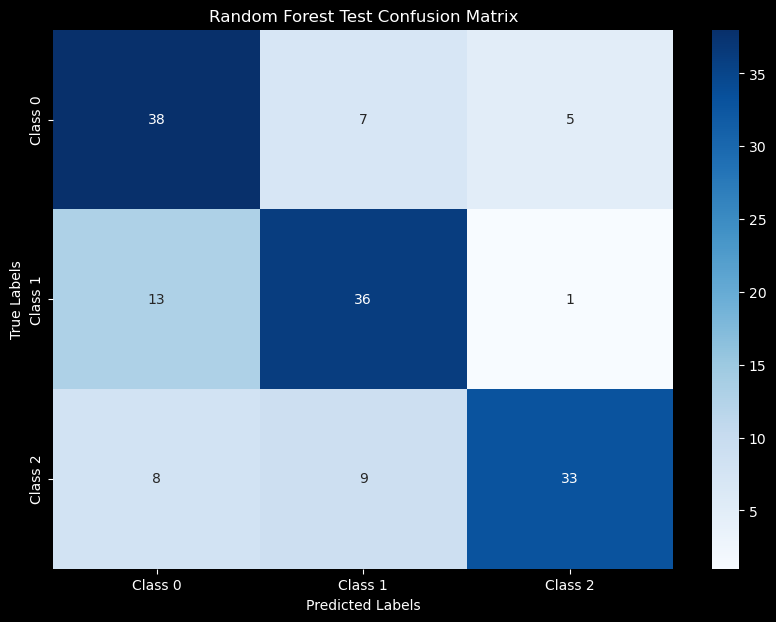

In [22]:
# Train the final model using the best parameters on the full training set
best_model_rf = RandomForestClassifier(**best_params_rf, random_state=42)
best_model_rf.fit(X_train_pca_rgb_df, y_train_rgb_df)

# Evaluate the final model on the validation set
y_val_pred_rf = best_model_rf.predict(X_val_pca_rgb_df)
val_accuracy_rf = accuracy_score(y_val_rgb_df, y_val_pred_rf)
print(f"Validation Accuracy (RF): {val_accuracy_rf}")
print("Validation Classification Report (RF):")
print(classification_report(y_val_rgb_df, y_val_pred_rf))

# Evaluate the final model on the test set
y_test_pred_rf = best_model_rf.predict(X_test_pca_rgb_df)
test_accuracy_rf = accuracy_score(y_test_rgb_df, y_test_pred_rf)
print(f"Test Accuracy (RF): {test_accuracy_rf}")
print("Test Classification Report (RF):")
print(classification_report(y_test_rgb_df, y_test_pred_rf))

# Confusion Matrix for the test set
cm_rf = confusion_matrix(y_test_rgb_df, y_test_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1', 'Class 2'], 
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Random Forest Test Confusion Matrix')
plt.show()


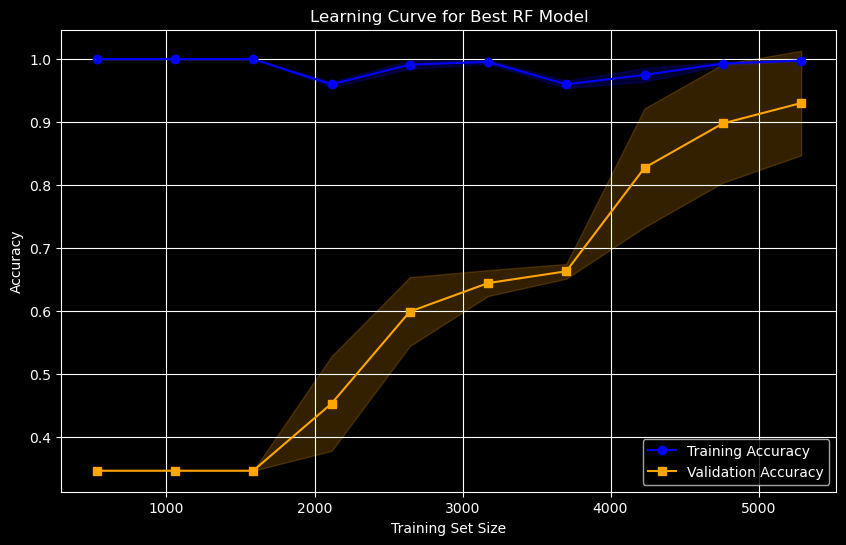

In [23]:
train_sizes = np.linspace(0.1, 1.0, 10)  # Fraction of training data to use

# Compute learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    estimator=best_model_rf,
    X=X_train_pca_rgb_df,
    y=y_train_rgb_df,
    train_sizes=train_sizes,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Calculate mean and standard deviation for training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Accuracy", color='blue', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)

plt.plot(train_sizes, val_mean, label="Validation Accuracy", color='orange', marker='s')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color='orange', alpha=0.2)

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve for Best RF Model')
plt.legend(loc='best')
plt.grid(True)
plt.show()


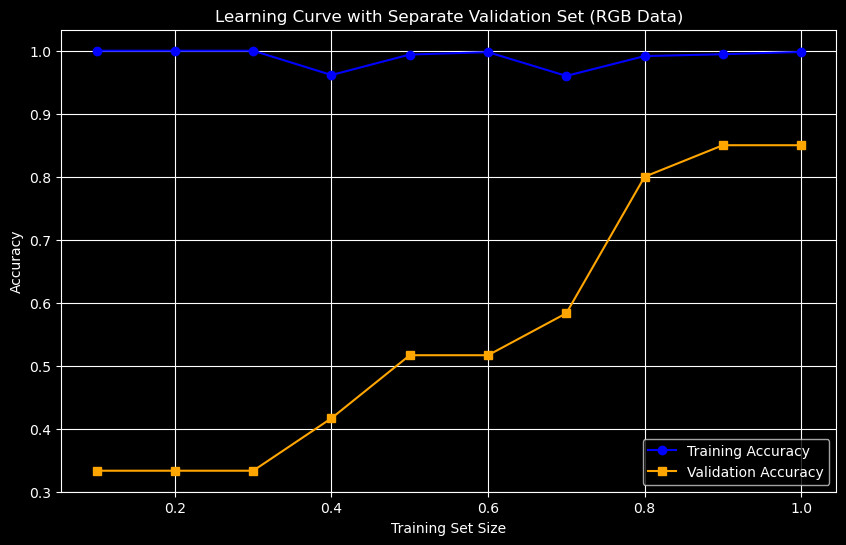

In [24]:
train_sizes = np.linspace(0.1, 1.0, 10)  # Fraction of training data to use
train_scores = []
val_scores = []

for train_size in train_sizes:
    # Determine subset of training data
    num_samples = int(len(X_train_pca_rgb_df) * train_size)  # Use RGB data here
    X_train_subset = X_train_pca_rgb_df[:num_samples]
    y_train_subset = y_train_rgb_df[:num_samples]  # Use RGB target labels here
    
    # Fit the model on this subset
    model = RandomForestClassifier(**best_params_rf, random_state=42)
    model.fit(X_train_subset, y_train_subset)
    
    # Evaluate training accuracy on the subset
    train_accuracy = accuracy_score(y_train_subset, model.predict(X_train_subset))
    train_scores.append(train_accuracy)
    
    # Evaluate validation accuracy using your separate validation data
    val_accuracy = accuracy_score(y_val_rgb_df, model.predict(X_val_pca_rgb_df))  # Use RGB validation data
    val_scores.append(val_accuracy)

# Plotting learning curve manually
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores, label="Training Accuracy", color='blue', marker='o')
plt.plot(train_sizes, val_scores, label="Validation Accuracy", color='orange', marker='s')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve with Separate Validation Set (RGB Data)')
plt.legend(loc='best')
plt.grid(True)
plt.show()
